# 🏡 Using Machine Learning to Guide InterState Relocations in Nigeria: Prediction and Recommendation Engine.

> ### **Author**: Tosin Harold Akingbemisilu

> ### **Date (Last Updated)**: 20th September 2022

Relocating from a State to another State within a country is not an easy task, most especially when trying to look for a new apartment, while considering your budget, location, proximity, etc. Normally, you would likely make a wrong decision if you do not have the right information to back it up. This was my experience relocating to Abuja, the capital city of Nigeria. Knowing exactly where to look for an apartment based on my budget and number of rooms I wanted was a bit difficult. Agents were not even helpful. It was also difficult getting something out of listing websites to aid my search as prices were all over the place. I therefore decided to embark on this project to help me tone down my search based on my criteria, which ended up very helpful in finding the perfect location to settle. I believe this can also help anyone trying to relocate within Nigeria.

This project would be in 3 parts:
1. **Web scraping and cleaning** of the data we will use from [Nigeria Property Centre website](https://nigeriapropertycentre.com/), one of the most popular property listing website in Nigeria.
2. **Exploratory analysis** of the data looking at the following (**NB: an interactive dashboard would be created on Tableau to help for further exploration and deep dive for all States in Nigeria**):
  - Is there any relationship between price and facilities?
  - Does time of the year have an effect on apartment rental price in a particular State? (Using Abuja as case study). If so, what is the best time of the year to relocate to a particular State in Nigeria?
  - Apartment Prices by States in Nigeria - top and least most expensive States in Nigeria.
  - Apartment Prices by Areas in Nigeria - top and least most expensive Areas in Nigeria.
  - Median Rental Price grouped by Area, identifying the most and least expensive place/neighbourhood in Abuja, Nigeria
  - Median Rental Price by number of bedroom (with a focus on 1, 2, 3 and 4 bedrooms) grouped by Area.
3. **Predictive Modelling**
  - Using the features available, can we predict the price of an apartment with an optimal accuracy score?
  - Using the available features such as one's budget and State, make a custom search function to recommend the best place to rent an apartment based on selected criteria.

## 1. Scraping and Cleaning our Data for Analysis

As mentioned earlier, we will be scraping our data from [Nigeria Property Centre website](https://nigeriapropertycentre.com/). This is one of the leading property website in Nigeria with property listings for sale, rent and lease, offering Nigerian property seekers an easy way to find details of property in Nigeria like homes, houses, lands, shops, office spaces and other commercial property. 

In our project however, we would be collecting data for unfurnished flats/Apartments posted for rent, with the knowledge that, not many States have furnished apartments for rent in Nigeria. The oldest data in this category was posted on 8 August 2020, and the newest as at the time of commencing this project was 9 August 2022 (updated 20 September). As at 20 September 2022, we have **622 pages (12,421 records)** to pull data from, based on our selection criteria. Here is the revised link after filtering: 
https://nigeriapropertycentre.com/for-rent/unfurnished/flats-apartments/showtype?page=1

### 1.1 Scraping the First Page

Firstly, we will try to scrape the first page, to test, setup our request and pull the data. Afterwards, we will use a while loop to read the content of the remaining pages. For the first attempt to get the information we would need, we will:  

- start by importing `requests` and `BeautifulSoup`. 
- use `requests` to send HTTP/1.1 requests using Python. With it, we can add content like headers, form data, multipart files, and parameters via simple Python libraries. It also allows us to access the response data of Python in the same way.
- use `BeautifulSoup` to pull data out of HTML and XML files.
- identify the classes used on the page for each element we want to pull. Inspect element would be used for this.

In [ ]:
# Import requests and BeautifulSoup
import requests
from bs4 import BeautifulSoup as bs

In [ ]:
# Used innocuous headers/agent because the request was timed out and asking for an agent. 
# Using following code we can fake the agent.
headers = {"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}
# Specify url and attach it to URL variable
URL = 'https://nigeriapropertycentre.com/for-rent/unfurnished/flats-apartments/showtype?page=1'

Now that we have successfully established the connection, we will go ahead to read the content of the website.

In [ ]:
# Read the website content
response = requests.get(URL, headers=headers)
content = response.content
soup = bs(content,"html.parser")

We have been able to successfully dump the content retrieved after accessing the website. The dumped content then will be passed to the BeautifulSoup function in order to get only the data with HTML/valid website tags that were used to develop the website.

In [ ]:
propertylist = soup.find_all("div",attrs={"class": "row property-list "})

Now that we have the data dumped into a variable `propertylist` which currently is not in a readable format, it is time to go ahead to format our scraped data.

We are interested in extracting the property's address, date, price, payment period, room details (number of bedroom, bathroom, toilet, parking space). In order to start looking for these details, we would need to find the HTML tags which store this information. We will be using the inspect on our chrome browser to view the tag that keeps the collection of properties and other tags which has other details.

In [ ]:
# Importing datetime to today() function to help us return the current date in the proper format of other dates, for the tags labeled as 'added today' from the website.
from datetime import date
today = date.today().strftime("%d %b %Y")

# Create a list 'list_property' to append our data from a 'dataframe' dictionary created to add our key and value from the pulled data
list_property =[]
for tr in propertylist:
    dataframe ={}
    dataframe["prop_add"] = (tr.find("address",attrs={"class": "voffset-bottom-10"})).text.replace(' \xa0', '')
    dataframe["prop_date"] = ((tr.find("span",attrs={"class": "added-on"})).text.replace(' \xa0', '').replace('Added ', '').replace('on ', '').replace('Today', str(today)))
    dataframe["prop_price_NGN"] = (tr.find("span",attrs={"class": "pull-sm-left"})).text.replace(' \xa0', '').replace('\n₦', '').replace(',', '').replace(' per annum ', '')
    dataframe["prop_pay_period"] = (tr.find("span",attrs={"class": "period"})).text.replace(' \xa0', '').strip()
    dataframe["prop_allroom"] = (tr.find("ul",attrs={"class": "aux-info"})).text.replace('\xa0', '').replace(' Save','').replace('Bedrooms','Bedroom')\
    .replace('Bathrooms','Bathroom').replace('Toilets','Toilet').replace('Parking Spaces','Parking Space').replace('Bedroom','Bedroom, ')\
    .replace('Bathroom','Bathroom, ').replace('Toilet','Toilet, ').replace('Parking Space','Parking Space')
    list_property.append(dataframe)

# show the number of properties
print(f'The total lenght of properties pulled is: {len(list_property)}')

The total lenght of properties pulled is: 20


In [ ]:
# View the first 5 properties pulled 
list_property[:5]

[{'prop_add': 'Ikate Elegushi, Lekki, Lagos',
  'prop_date': '06 Sep 2022',
  'prop_price_NGN': '3000000',
  'prop_pay_period': 'per annum',
  'prop_allroom': '2 Bedroom, 2 Bathroom, 3 Toilet, '},
 {'prop_add': 'Lekki Palms Estate, Ajah, Lagos',
  'prop_date': '06 Jul 2022',
  'prop_price_NGN': '1750000',
  'prop_pay_period': 'per annum',
  'prop_allroom': '2 Bedroom, 2 Bathroom, 2 Toilet, '},
 {'prop_add': 'Agungi, Lekki, Lagos',
  'prop_date': '20 Sep 2022',
  'prop_price_NGN': '1800000',
  'prop_pay_period': 'per annum',
  'prop_allroom': '2 Bedroom, 3 Toilet, '},
 {'prop_add': 'Ikoyi, Lagos',
  'prop_date': '06 Aug 2022',
  'prop_price_NGN': '10000000',
  'prop_pay_period': 'per annum',
  'prop_allroom': '3 Bedroom, 3 Toilet, '},
 {'prop_add': 'First Unity Estate Cooperative Villa Badore Addo Ajah Lagos, Ajah, Lagos',
  'prop_date': '20 Sep 2022',
  'prop_price_NGN': '700000',
  'prop_pay_period': 'per annum',
  'prop_allroom': '1 Bedroom, 1 Bathroom, 2 Toilet, 5 Parking Space'}]

### 1.2 Scraping the Whole Site and loading to CSV

Great! Now that we have everything figured out for the first page, we will go ahead to pull out all the **622** pages. Here are the additional steps for this phase:

- We will go through all the steps we have already processed earlier to pull data from the first page, except that this time, we will use a while loop to search through each page on the site, by specifying the total steps or number of pages we want to loop through. In this case, we will be using `https://nigeriapropertycentre.com/for-rent/unfurnished/flats-apartments/showtype?page=` without the number, but we will specify the first number as 1 and assign it to a variable `page`.
- We will append our data to `property_all` variable from the dictionary `dataframe2` created to pull data from each page.
- we will use a `sleep` function, to randomly slow down the iteration process, in order to prevent our IP from being blocked. Overall, we would be expecting a total number of **12,421** records.
- Convert our scraped data into a dataframe and load into a csv for subsequent use

In [ ]:
import pandas as pd
from random import randint
from datetime import date
from time import sleep
today = date.today().strftime("%d %b %Y")
page = 1
property_all = []
while page != 623:
  #print(f'...Printing Page: {page}')
  url2 = f"https://nigeriapropertycentre.com/for-rent/unfurnished/flats-apartments/showtype?page={page}"
  headers = {"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}
  response2 = requests.get(url2, headers=headers)
  content2 = response2.content
  soup2 = bs(content2,"html.parser")
  propertylist2 = soup2.find_all("div",attrs={"class": "row property-list "})
      
  for tr in propertylist2:
    dataframe2 ={}
    dataframe2["prop_add"] = (tr.find("address",attrs={"class": "voffset-bottom-10"})).text.replace(' \xa0', '')
    dataframe2["prop_date"] = ((tr.find("span",attrs={"class": "added-on"})).text.replace(' \xa0', '').replace('Added ', '').replace('on ', '').replace('Today', str(today)))
    dataframe2["prop_price_NGN"] = (tr.find("span",attrs={"class": "pull-sm-left"})).text.replace(' \xa0', '').replace('\n₦', '').replace(',', '').replace(' per annum ', '')
    dataframe2["prop_pay_period"] = (tr.find("span",attrs={"class": "period"})).text.replace(' \xa0', '').strip()
    dataframe2["prop_allroom"] = (tr.find("ul",attrs={"class": "aux-info"})).text.replace('\xa0', '').replace(' Save','').replace('Bedrooms','Bedroom').replace('Bathrooms','Bathroom')\
    .replace('Toilets','Toilet').replace('Parking Spaces','Parking Space').replace('Bedroom','Bedroom, ').replace('Bathroom','Bathroom, ').replace('Toilet','Toilet, ').replace('Parking Space','Parking Space')
    property_all.append(dataframe2)
    
    # Slow down the next process to prevent the IP from being blocked
    # sleep(randint(2,6))

  page = page + 1
print(f'{len(property_all)} property records scraped')

12421 property records scraped


In [ ]:
# View the first 5
property_all[:5]

[{'prop_add': 'Ikate Elegushi, Lekki, Lagos',
  'prop_date': '06 Sep 2022',
  'prop_price_NGN': '3000000',
  'prop_pay_period': 'per annum',
  'prop_allroom': '2 Bedroom, 2 Bathroom, 3 Toilet, '},
 {'prop_add': 'Lekki Palms Estate, Ajah, Lagos',
  'prop_date': '06 Jul 2022',
  'prop_price_NGN': '1750000',
  'prop_pay_period': 'per annum',
  'prop_allroom': '2 Bedroom, 2 Bathroom, 2 Toilet, '},
 {'prop_add': 'Agungi, Lekki, Lagos',
  'prop_date': '20 Sep 2022',
  'prop_price_NGN': '1800000',
  'prop_pay_period': 'per annum',
  'prop_allroom': '2 Bedroom, 3 Toilet, '},
 {'prop_add': 'Ikoyi, Lagos',
  'prop_date': '06 Aug 2022',
  'prop_price_NGN': '10000000',
  'prop_pay_period': 'per annum',
  'prop_allroom': '3 Bedroom, 3 Toilet, '},
 {'prop_add': 'First Unity Estate Cooperative Villa Badore Addo Ajah Lagos, Ajah, Lagos',
  'prop_date': '20 Sep 2022',
  'prop_price_NGN': '700000',
  'prop_pay_period': 'per annum',
  'prop_allroom': '1 Bedroom, 1 Bathroom, 2 Toilet, 5 Parking Space'}]

In [ ]:
# Convert our scraped data to a dataframe and save the raw dataframe to csv
raw_df = pd.DataFrame(property_all)
raw_df.to_csv("drive/MyDrive/Data Science and ML projects/Nigerian State Relocation Guide Data/raw_property_all.csv",index=False)

### 1.3 Cleaning the Scraped Data

Perfect! We have been able to successfully scrape all the **622** pages and **12421** records and converted to a dataframe. It is time to clean our data.

We will go through the following steps:
- Load our saved csv
- Split some of the column to create new variables.
- Save it in a csv so we can reuse or share anytime.

In [ ]:
# Load our saved csv
import pandas as pd
raw_df_load = pd.read_csv("drive/MyDrive/Data Science and ML projects/Nigerian State Relocation Guide Data/raw_property_all.csv")
raw_df_load.head()

,prop_add,prop_date,prop_price_NGN,prop_pay_period,prop_allroom
0,"Ikate Elegushi, Lekki, Lagos",06 Sep 2022,3000000,per annum,"2 Bedroom, 2 Bathroom, 3 Toilet,"
1,"Lekki Palms Estate, Ajah, Lagos",06 Jul 2022,1750000,per annum,"2 Bedroom, 2 Bathroom, 2 Toilet,"
2,"Agungi, Lekki, Lagos",20 Sep 2022,1800000,per annum,"2 Bedroom, 3 Toilet,"
3,"Ikoyi, Lagos",06 Aug 2022,10000000,per annum,"3 Bedroom, 3 Toilet,"
4,First Unity Estate Cooperative Villa Badore Ad...,20 Sep 2022,700000,per annum,"1 Bedroom, 1 Bathroom, 2 Toilet, 5 Parking Space"


**Looking at our raw dataframe, we will need to split some of the columns:**
- Split `prop_add` to `State` and `Area`
- Split `prop_allroom` to `Bedroom`, `Bathroom`, `Toilet`, `Parking Space`

In [ ]:
raw_df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12421 entries, 0 to 12420
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   prop_add         12421 non-null  object
 1   prop_date        12421 non-null  object
 2   prop_price_NGN   12421 non-null  object
 3   prop_pay_period  12340 non-null  object
 4   prop_allroom     12289 non-null  object
dtypes: object(5)
memory usage: 485.3+ KB


We will commence by dropping the rows that has empty `prop_allroom`, since no detail was provided for all the rooms. We will also drop rows with null `prop_pay_period`. Looking at the information above, since only these two columns have missing values, we will drop all rows with null values. The rows with missing data are also just about 1% of the whole records, so we won't miss them 😀. We will also drop duplicates if there are any.

In [ ]:
# Drop all rows with at least one missing value or duplicates
raw_df_load = raw_df_load.dropna()
raw_df_load = raw_df_load.drop_duplicates()
raw_df_load.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12050 entries, 0 to 12420
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   prop_add         12050 non-null  object
 1   prop_date        12050 non-null  object
 2   prop_price_NGN   12050 non-null  object
 3   prop_pay_period  12050 non-null  object
 4   prop_allroom     12050 non-null  object
dtypes: object(5)
memory usage: 564.8+ KB


Perfect! Now, we have no empty rows at least for now and we have a total record of 12050, which is more than enough for our project. We will go ahead to create new variables from our data by splitting the necessary columns.

Our `State` is located as the last word on the `prop_add`, while the `Area` is at the second to the last position. We will use this information to return the location of the string when splitting.

In [ ]:
# Split State and Area and remove any leading spaces
raw_df_load["State"] = raw_df_load["prop_add"].str.split(',').str[-1].str.strip()
raw_df_load["Area"] = raw_df_load["prop_add"].str.split(',').str[-2].str.strip()
raw_df_load.head()

,prop_add,prop_date,prop_price_NGN,prop_pay_period,prop_allroom,State,Area
0,"Ikate Elegushi, Lekki, Lagos",06 Sep 2022,3000000,per annum,"2 Bedroom, 2 Bathroom, 3 Toilet,",Lagos,Lekki
1,"Lekki Palms Estate, Ajah, Lagos",06 Jul 2022,1750000,per annum,"2 Bedroom, 2 Bathroom, 2 Toilet,",Lagos,Ajah
2,"Agungi, Lekki, Lagos",20 Sep 2022,1800000,per annum,"2 Bedroom, 3 Toilet,",Lagos,Lekki
3,"Ikoyi, Lagos",06 Aug 2022,10000000,per annum,"3 Bedroom, 3 Toilet,",Lagos,Ikoyi
4,First Unity Estate Cooperative Villa Badore Ad...,20 Sep 2022,700000,per annum,"1 Bedroom, 1 Bathroom, 2 Toilet, 5 Parking Space",Lagos,Ajah


Now that we have our `State` and `Area` separated into different columns from the `prop_add` column, it is time to split the Bedroom, Bathroom, Toilet, and Parking space from `prop_allroom`.

In [ ]:
# Split Bedroom, Bathroom, Toilet, Parking Space from prop_allroom
raw_df_load["Bedroom"] = raw_df_load["prop_allroom"].str.split(' Bedroom').str[0].str.strip()
raw_df_load["Bathroom"] = raw_df_load["prop_allroom"].str.split(' Bathroom').str[0].str.split(',').str[-1].str.strip()
raw_df_load["Toilet"] = raw_df_load["prop_allroom"].str.split(' Toilet').str[0].str.split(',').str[-1].str.strip()
raw_df_load["Parking"] = raw_df_load["prop_allroom"].str.split(' Parking Space').str[0].str.split(',').str[-1].str.strip()
raw_df_load.head(10)

,prop_add,prop_date,prop_price_NGN,prop_pay_period,prop_allroom,State,Area,Bedroom,Bathroom,Toilet,Parking
0,"Ikate Elegushi, Lekki, Lagos",06 Sep 2022,3000000,per annum,"2 Bedroom, 2 Bathroom, 3 Toilet,",Lagos,Lekki,2,2,3,
1,"Lekki Palms Estate, Ajah, Lagos",06 Jul 2022,1750000,per annum,"2 Bedroom, 2 Bathroom, 2 Toilet,",Lagos,Ajah,2,2,2,
2,"Agungi, Lekki, Lagos",20 Sep 2022,1800000,per annum,"2 Bedroom, 3 Toilet,",Lagos,Lekki,2,,3,
3,"Ikoyi, Lagos",06 Aug 2022,10000000,per annum,"3 Bedroom, 3 Toilet,",Lagos,Ikoyi,3,,3,
4,First Unity Estate Cooperative Villa Badore Ad...,20 Sep 2022,700000,per annum,"1 Bedroom, 1 Bathroom, 2 Toilet, 5 Parking Space",Lagos,Ajah,1,1,2,5
5,"Mobile Road Ajah Ilaje Lagos, Ilaje, Ajah, Lagos",20 Sep 2022,1200000,per annum,"2 Bedroom, 2 Bathroom, 3 Toilet, 5 Parking Space",Lagos,Ajah,2,2,3,5
6,"Admiralty Homes Estate, Off Alpha Beach Road, ...",20 Sep 2022,1800000,per annum,"2 Bedroom, 2 Bathroom, 2 Toilet, 1 Parking Space",Lagos,Lekki,2,2,2,1
7,"Jahi, Abuja",20 Sep 2022,1700000,per annum,"1 Bedroom, 1 Bathroom, 2 Toilet, 2 Parking Space",Abuja,Jahi,1,1,2,2
8,"Jahi Gilmore, Jahi, Abuja",20 Sep 2022,3500000,per annum,"3 Bedroom, 4 Bathroom, 4 Toilet, 2 Parking Space",Abuja,Jahi,3,4,4,2
9,"Opic, Isheri North, Lagos",18 Aug 2022,1400000,per annum,"3 Bedroom, 5 Bathroom, 4 Toilet, 3 Parking Space",Lagos,Isheri North,3,5,4,3


Great! We now have all our columns splitted. We will remove the `prop_add` and `prop_allroom` since we no longer need them in our analysis.

In [ ]:
# Remove prop_add and prop_allroom column from raw_df_load
raw_df_load.drop(['prop_add', 'prop_allroom'], axis=1, inplace=True)
raw_df_load.head()

,prop_date,prop_price_NGN,prop_pay_period,State,Area,Bedroom,Bathroom,Toilet,Parking
0,06 Sep 2022,3000000,per annum,Lagos,Lekki,2,2,3,
1,06 Jul 2022,1750000,per annum,Lagos,Ajah,2,2,2,
2,20 Sep 2022,1800000,per annum,Lagos,Lekki,2,,3,
3,06 Aug 2022,10000000,per annum,Lagos,Ikoyi,3,,3,
4,20 Sep 2022,700000,per annum,Lagos,Ajah,1,1,2,5


In [ ]:
raw_df_load.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12050 entries, 0 to 12420
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   prop_date        12050 non-null  object
 1   prop_price_NGN   12050 non-null  object
 2   prop_pay_period  12050 non-null  object
 3   State            12050 non-null  object
 4   Area             12050 non-null  object
 5   Bedroom          12050 non-null  object
 6   Bathroom         12050 non-null  object
 7   Toilet           12050 non-null  object
 8   Parking          12050 non-null  object
dtypes: object(9)
memory usage: 941.4+ KB


Looking good! We are now going to look through each of the columns, to find out if there are any rows that does not meet the criteria we expect for that column, and try to clean them up. We will do this in the order of the column, starting with `prop_date`. For a start, we would purposely use the value_count, with the knowledge that texts would be brought forward.

In [ ]:
raw_df_load.prop_date.value_counts()

20 Sep 2022    341
14 Sep 2022    265
08 Sep 2022    259
16 Sep 2022    250
13 Sep 2022    240
              ... 
21 Nov 2021      1
06 Dec 2021      1
05 Jun 2021      1
02 Oct 2021      1
27 Sep 2020      1
Name: prop_date, Length: 635, dtype: int64

Building on above information. We currently have some rows stated as `Yesterday`. We missed that when scraping from the website. Latest record at the time of pulling the records was 20 September 2022, which was exactly the day the data was scraped. This means Yesterday should be 19 September 2022. We will replace all `Yesterday` with this.

In [ ]:
# Replace Yesterday in the prop_date column with 08 Aug 2022
raw_df_load["prop_date"] = raw_df_load["prop_date"].str.replace('Yesterday', '08 Aug 2022')
raw_df_load.prop_date.value_counts()

20 Sep 2022    341
08 Aug 2022    287
14 Sep 2022    265
08 Sep 2022    259
16 Sep 2022    250
              ... 
21 Nov 2021      1
06 Dec 2021      1
05 Jun 2021      1
02 Oct 2021      1
27 Sep 2020      1
Name: prop_date, Length: 634, dtype: int64

We will go ahead to convert this column to datetime without using coerce. With all things being equal, we should not get an error.

In [ ]:
# Convert prop_date column to datetime
raw_df_load["prop_date"] = pd.to_datetime(raw_df_load["prop_date"])
raw_df_load.head()

,prop_date,prop_price_NGN,prop_pay_period,State,Area,Bedroom,Bathroom,Toilet,Parking
0,2022-09-06,3000000,per annum,Lagos,Lekki,2,2,3,
1,2022-07-06,1750000,per annum,Lagos,Ajah,2,2,2,
2,2022-09-20,1800000,per annum,Lagos,Lekki,2,,3,
3,2022-08-06,10000000,per annum,Lagos,Ikoyi,3,,3,
4,2022-09-20,700000,per annum,Lagos,Ajah,1,1,2,5


Beautiful! `prop_date` looking all set for analysis. We are now moving on to `prop_price_NGN`. We will check if for any rows that is not a digit, and return these rows.

In [ ]:
# Check for rows in prop_price_NGN that are not digits
raw_df_load['price_is_digit'] = list(map(lambda x: x.isdigit(), raw_df_load["prop_price_NGN"]))
display(raw_df_load.loc[(raw_df_load.price_is_digit == False)])

,prop_date,prop_price_NGN,prop_pay_period,State,Area,Bedroom,Bathroom,Toilet,Parking,price_is_digit
70,2022-09-20,\n$1200000\napprox. ₦541182507\n,per annum,Lagos,Ikoyi,3,4,4,3,False
1528,2022-05-18,\n$75000\napprox. ₦33823907\n,per annum,Lagos,Ikoyi,4,4,5,2,False
1556,2022-09-09,\n$30000\napprox. ₦13529563\n,per annum,Abuja,Maitama District,1,1,2,3,False
1566,2022-09-09,\n$50000\napprox. ₦22549271\n,per annum,Lagos,Ikoyi,3,3,4,2,False
1570,2022-03-14,\n$100000\napprox. ₦45098542\n,per annum,Lagos,Ikoyi,3,3,4,2,False
...,...,...,...,...,...,...,...,...,...,...
12190,2021-06-14,350000 per month,per month,Lagos,Lekki,"1 Bathroom, 1 Toilet, 6 Parking Space600 sqm T...",1,1,6,False
12193,2021-07-02,\n$100000\napprox. ₦45098542\n,per annum,Lagos,Ikoyi,4,4,5,,False
12330,2021-03-02,\n$90000\napprox. ₦40588688\n,per annum,Lagos,Victoria Island (VI),4,5,6,2,False
12334,2021-02-02,\n$55000\napprox. ₦24804198\n,per annum,Lagos,Ikoyi,2,2,3,2,False


Interesting! We could see about 70 rows with 'per month' added after some numbers, and some strange texts before some. We will use these information to clean them up.

In [ ]:
# Clean the prop_date column
raw_df_load["prop_price_NGN"] = raw_df_load["prop_price_NGN"].str.replace(' per month', '').str.strip()
raw_df_load["prop_price_NGN"] = raw_df_load["prop_price_NGN"].str.replace('\n', '').str.strip()
raw_df_load["prop_price_NGN"] = raw_df_load["prop_price_NGN"].str.split('₦').str[-1].str.strip()

# Check again for rows in prop_price_NGN that are not digits
raw_df_load['price_is_digit'] = list(map(lambda x: x.isdigit(), raw_df_load["prop_price_NGN"]))
display(raw_df_load.loc[(raw_df_load.price_is_digit == False)])

,prop_date,prop_price_NGN,prop_pay_period,State,Area,Bedroom,Bathroom,Toilet,Parking,price_is_digit


Nice! Since it displayed no record, this means we have all our `prop_price_NGN` looking set to go. Let's take one last step to be sure we had the right figure, by returning a value based on the index number and compare with the table above, to be certain.

In [ ]:
# Confirm the right numbers were extracted
display(raw_df_load.loc[12334:12336])

,prop_date,prop_price_NGN,prop_pay_period,State,Area,Bedroom,Bathroom,Toilet,Parking,price_is_digit
12334,2021-02-02,24804198,per annum,Lagos,Ikoyi,2,2,3,2,True
12335,2021-02-25,4000000,per annum,Lagos,Ikoyi,2,2,3,,True
12336,2021-02-25,15784490,per annum,Lagos,Victoria Island (VI),3,3,4,2,True


Perfect! Now we move to our next column. From observation based on above cleaning, some of the values were listed as `per annum` while some as `per month`. Let's do a quick check with the `value_counts()` function.

In [ ]:
raw_df_load['prop_pay_period'].value_counts()

per annum    12034
per month       16
Name: prop_pay_period, dtype: int64

Let's take a look at the rows that has per month, probably this could be a mistake when listing.

In [ ]:
# selecting houses with prop_pay_period 'per month'
display(raw_df_load.loc[(raw_df_load.prop_pay_period == 'per month')])

,prop_date,prop_price_NGN,prop_pay_period,State,Area,Bedroom,Bathroom,Toilet,Parking,price_is_digit
2111,2022-09-04,100000,per month,Lagos,Lekki,"1 Bathroom, 1 Toilet, 1 Parking Space",1,1,1,True
3327,2022-07-28,150000,per month,Lagos,Lekki,1,1,1,,True
4361,2022-09-15,750000000,per month,Abuja,Maitama District,3,3,4,3,True
5500,2022-09-02,250000,per month,Lagos,Lekki,"1 Bathroom, 1 Toilet, 3 Parking Space",1,1,3,True
5581,2022-09-01,14000000,per month,Lagos,Ikoyi,3,3,4,1,True
6693,2022-08-17,700000,per month,Lagos,Lekki,1,1,1,,True
7944,2022-07-10,150000,per month,Lagos,Lekki,"1 Bathroom, 1 Toilet, 5 Parking Space",1,1,5,True
8328,2022-09-15,400000,per month,Abuja,Utako,1,1,1,10,True
9054,2022-08-03,1500000,per month,Lagos,Ajah,2,2,3,,True
9563,2022-07-08,4500000,per month,Lagos,Lekki,3,3,4,2,True


Some of these areas look overpriced, even though some are in high end areas. If we are to convert them to per annum, we may end up with exaggerated figures. Most of these apartments are listed by the owners, and I am currently suspecting they could be errors. Since we have only 16 records, the best is to drop them. We would still have more records to play around with and we won't miss them too 😀. We should end up with 12034 records.

In [ ]:
# Drop all rows with prop_pay_period listed as per month
raw_df_load = raw_df_load.drop(raw_df_load[raw_df_load.prop_pay_period == 'per month'].index)
raw_df_load['prop_pay_period'].value_counts()

per annum    12034
Name: prop_pay_period, dtype: int64

Nice! Moving on, State and Area would not have an issue, since they are primarily strings, and system driven as drop downs at the point of listing and selection. However, let's take a look at the number of States and records we have per State.

In [ ]:
# Count number of records per state available in our dataframe
raw_df_load['State'].value_counts()

Lagos        10373
Abuja         1290
Ogun           165
Rivers          97
Enugu           33
Oyo             29
Delta           28
Akwa Ibom       11
Osun             4
Kaduna           2
Nasarawa         1
Edo              1
Name: State, dtype: int64

Hmm. This would limit our research by forcing us to focus on the top cities in Nigeria, since they are the States with the most listed properties. This would still do, since they are usually the most difficult places to make decisions when getting apartments. We may eventually drop the States with low figures when commencing with the analysis, but for now, let's move on to cleaning Bedroom, Bathroom, Toilet and Parking Space.

In [ ]:
# Check for rows in Bedroom that are not digits
raw_df_load['Bedroom_is_digit'] = list(map(lambda x: x.isdigit(), raw_df_load["Bedroom"]))
display(raw_df_load.loc[(raw_df_load.Bedroom_is_digit == False)])

,prop_date,prop_price_NGN,prop_pay_period,State,Area,Bedroom,Bathroom,Toilet,Parking,price_is_digit,Bedroom_is_digit
20,2022-09-15,500000,per annum,Lagos,Lekki,"1 Bathroom, 1 Toilet, 1 Parking Space2,453 sqm...",1,1,1,True,False
26,2022-09-20,1000000,per annum,Lagos,Lekki,"1 Bathroom, 1 Toilet, 1 Parking Space",1,1,1,True,False
29,2022-09-20,650000,per annum,Lagos,Ajah,"1 Bathroom, 1 Toilet, 8 Parking Space",1,1,8,True,False
33,2022-09-20,4000000,per annum,Lagos,Ikoyi,"1 Bathroom, 1 Toilet,",1,1,,True,False
36,2022-09-20,800000,per annum,Lagos,Lekki,"1 Bathroom, 1 Toilet,",1,1,,True,False
...,...,...,...,...,...,...,...,...,...,...,...
12344,2021-02-16,950000,per annum,Abuja,Wuye,"1 Bathroom, 1 Toilet, 1 Parking Space850 sqm T...",1,1,1,True,False
12359,2021-01-20,450000,per annum,Lagos,Gbagada,"1 Bathroom, 1 Toilet, 1 Parking Space",1,1,1,True,False
12374,2020-12-22,450000,per annum,Abuja,Lugbe District,"1 Bathroom, 1 Toilet, 1 Parking Space",1,1,1,True,False
12402,2020-11-05,350000,per annum,Lagos,Ajah,"1 Bathroom, 1 Toilet, 1 Parking Space300 sqm T...",1,1,1,True,False


Most of the properties that are 1 bedroom were not stated, building from the number of bathroom, toilet, and parking. We will replace all the strings with 1 in Bedroom.

Also, we currently have some empty spaces and strings in Bathroom, Toilet and Parking. For the empty records and strings in Bathroom, we will replace with number of bedrooms, and for empty records and strings in Toilet, we will replace with number of Bathrooms. It would be difficult to figure out the number of parking spaces, however, if the number of records with parking space are not significant, we will drop the rows, else, we will drop the column.

In [ ]:
import numpy as np
# Replace all Strings in Bedroom with 1
raw_df_load["Bedroom"]=np.where(raw_df_load["Bedroom"].str.isdigit(),raw_df_load["Bedroom"],1)

# Replace empty records and strings in Bathroom with number of bedroom
raw_df_load["Bathroom"]=np.where(raw_df_load["Bathroom"].str.isdigit(),raw_df_load["Bathroom"],raw_df_load["Bedroom"])

# Replace empty records and strings in Toilet with number of bathroom
raw_df_load["Toilet"]=np.where(raw_df_load["Toilet"].str.isdigit(),raw_df_load["Toilet"],raw_df_load["Bathroom"])

raw_df_load

,prop_date,prop_price_NGN,prop_pay_period,State,Area,Bedroom,Bathroom,Toilet,Parking,price_is_digit,Bedroom_is_digit
0,2022-09-06,3000000,per annum,Lagos,Lekki,2,2,3,,True,True
1,2022-07-06,1750000,per annum,Lagos,Ajah,2,2,2,,True,True
2,2022-09-20,1800000,per annum,Lagos,Lekki,2,2,3,,True,True
3,2022-08-06,10000000,per annum,Lagos,Ikoyi,3,3,3,,True,True
4,2022-09-20,700000,per annum,Lagos,Ajah,1,1,2,5,True,True
...,...,...,...,...,...,...,...,...,...,...,...
12416,2020-10-08,1200000,per annum,Lagos,Ajah,3,3,4,10,True,True
12417,2020-10-05,4000000,per annum,Lagos,Ikeja,2,2,3,,True,True
12418,2020-09-27,13000000,per annum,Lagos,Ikoyi,3,3,4,2,True,True
12419,2020-09-26,15000000,per annum,Lagos,Ikoyi,4,4,5,2,True,True


In [ ]:
# Check for rows in parking that are not digits
raw_df_load['Parking_is_digit'] = list(map(lambda x: x.isdigit(), raw_df_load["Parking"]))
raw_df_load["Parking_is_digit"].value_counts()

True     7135
False    4899
Name: Parking_is_digit, dtype: int64

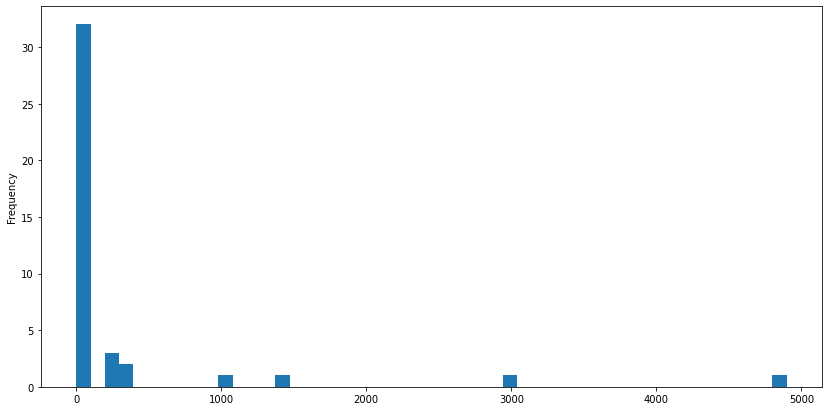

In [ ]:
raw_df_load["Parking"]=np.where(raw_df_load["Parking"].str.isdigit(),raw_df_load["Parking"],"")
raw_df_load["Parking"].value_counts().plot.hist(bins=50, figsize=(14,7));

We have 4553 missing records for parking space and few outliers which makes this field a bit unreliable. As mentioned earlier, we will drop this column since it is not much of an information given in most of the properties listed.We will also drop prop_pay_period, price_is_digit and Bedroom_is_digit left or created earlier to conclude the cleaning of our data.

In [ ]:
# Remove prop_pay_period, price_is_digit and Bedroom_is_digit column from raw_df_load
raw_df_load.drop(["prop_pay_period", "Parking", "price_is_digit", "Bedroom_is_digit", "Parking_is_digit"], axis=1, inplace=True)
raw_df_load.head()

,prop_date,prop_price_NGN,State,Area,Bedroom,Bathroom,Toilet
0,2022-09-06,3000000,Lagos,Lekki,2,2,3
1,2022-07-06,1750000,Lagos,Ajah,2,2,2
2,2022-09-20,1800000,Lagos,Lekki,2,2,3
3,2022-08-06,10000000,Lagos,Ikoyi,3,3,3
4,2022-09-20,700000,Lagos,Ajah,1,1,2


In [ ]:
raw_df_load.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12034 entries, 0 to 12420
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   prop_date       12034 non-null  datetime64[ns]
 1   prop_price_NGN  12034 non-null  object        
 2   State           12034 non-null  object        
 3   Area            12034 non-null  object        
 4   Bedroom         12034 non-null  object        
 5   Bathroom        12034 non-null  object        
 6   Toilet          12034 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 752.1+ KB


Since we now have all our features cleaned, we would convert the relevant columns to numeric.

In [ ]:
# Convert numeric columns to numeric
raw_df_load[["prop_price_NGN", "Bedroom", "Bathroom", "Toilet"]] = raw_df_load[["prop_price_NGN", "Bedroom", "Bathroom", "Toilet"]].apply(pd.to_numeric)

In [ ]:
raw_df_load.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12034 entries, 0 to 12420
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   prop_date       12034 non-null  datetime64[ns]
 1   prop_price_NGN  12034 non-null  int64         
 2   State           12034 non-null  object        
 3   Area            12034 non-null  object        
 4   Bedroom         12034 non-null  int64         
 5   Bathroom        12034 non-null  int64         
 6   Toilet          12034 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 752.1+ KB


In [ ]:
raw_df_load.describe()

,prop_price_NGN,Bedroom,Bathroom,Toilet
count,1.203400e+04,12034.000000,12034.000000,12034.000000
mean,5.452530e+06,2.170434,19.007479,40.305052
std,8.365162e+07,1.163571,1833.149638,4102.087667
min,7.000000e+03,1.000000,1.000000,1.000000
25%,1.000000e+06,1.000000,1.000000,2.000000
50%,2.000000e+06,2.000000,2.000000,3.000000
75%,4.000000e+06,3.000000,3.000000,4.000000
max,8.000000e+09,34.000000,201098.000000,450000.000000


Looking at the max value, it is obvious we have some outliers in Bedroom, Bathroom and Toilet. Let's filter our dataframe to view the properties that are more than 8 rooms.

In [ ]:
display(raw_df_load.loc[(raw_df_load.Bedroom > 8)])

,prop_date,prop_price_NGN,State,Area,Bedroom,Bathroom,Toilet
351,2022-09-14,8000000,Lagos,Ajah,15,15,19
842,2022-06-16,21000000,Abuja,Guzape District,18,18,24
1564,2022-09-09,16000000,Abuja,Maitama District,12,16,16
2679,2022-08-26,25000000,Lagos,Ikeja,10,10,15
3266,2022-08-02,27000000,Lagos,Lekki,12,12,18
3290,2022-08-01,27000000,Lagos,Ikoyi,32,32,32
3540,2022-04-19,8000000,Lagos,Ilupeju,12,12,12
3962,2022-09-20,25000000,Abuja,Guzape District,12,12,16
4075,2022-08-08,2000000,Lagos,Lekki,12,2,2
5246,2022-09-06,1400000,Lagos,Isolo,9,3,3


The sort of number above is very impossible in Nigerian context. It would be difficult to see a flat or apartment with more than 8 rooms max. They are few, so, to be on the safe side, we will be doing away with values in this columns that are more than 8 for bedroom.

In [ ]:
# Drop rows from Bedroom that are greater than 8
raw_df_load.drop(raw_df_load[raw_df_load["Bedroom"] > 8].index, inplace = True)

Now, let's look at the Bathroom to display bathrooms more than 8. We will replace them with the number of bedrooms.

In [ ]:
display(raw_df_load.loc[(raw_df_load.Bathroom > 8)])

,prop_date,prop_price_NGN,State,Area,Bedroom,Bathroom,Toilet
73,2022-09-20,1500000,Lagos,Lekki,1,11,2
1364,2022-08-19,14000000,Lagos,Ikoyi,2,201098,3
1788,2022-09-07,3500000,Abuja,Wuse 2,3,23,4
2520,2022-05-04,21000000,Abuja,Guzape District,3,15,24
3190,2022-08-06,3500000,Lagos,Lekki,3,13,4
7229,2022-08-05,2000000,Lagos,Lekki,2,21,3
8800,2022-08-19,2500000,Lagos,Ikeja,2,22,3


In [ ]:
# Replace Bathrooms that are greater than 8 with the number of bedroom
raw_df_load["Bathroom"]=np.where(raw_df_load["Bathroom"] > 8, raw_df_load["Bedroom"],raw_df_load["Bathroom"])

# Confirm with index 8953, part of the affected rows shown above
display(raw_df_load.loc[8800:8801])

,prop_date,prop_price_NGN,State,Area,Bedroom,Bathroom,Toilet
8800,2022-08-19,2500000,Lagos,Ikeja,2,2,3
8801,2022-08-19,1300000,Lagos,Lekki,1,1,1


Finally, we will do thesame for Toilet, and replace with the number of bathroom for those greater than 8

In [ ]:
display(raw_df_load.loc[(raw_df_load.Toilet > 8)])

,prop_date,prop_price_NGN,State,Area,Bedroom,Bathroom,Toilet
582,2022-09-17,25000000,Lagos,Ikoyi,7,7,15
2520,2022-05-04,21000000,Abuja,Guzape District,3,3,24
4298,2022-09-16,400000,Lagos,Ajah,1,1,11
5887,2022-08-29,3000000,Lagos,Lekki,3,3,433
7273,2022-08-03,450000,Lagos,Shomolu,1,1,450000
8246,2022-09-20,500000,Lagos,Ajah,1,1,30
9155,2022-07-29,2500000,Lagos,Lekki,2,2,32
9286,2022-07-24,15000000,Abuja,Asokoro District,2,2,18
11246,2022-03-16,4000000,Rivers,Port Harcourt,8,8,12
12030,2021-09-21,5000000,Lagos,Victoria Island (VI),2,2,32


In [ ]:
# Replace Toilets that are greater than 8 with the number of bathroom
raw_df_load["Toilet"]=np.where(raw_df_load["Toilet"] > 8, raw_df_load["Bathroom"],raw_df_load["Toilet"])

# Confirm with index 8953, part of the affected rows shown above
display(raw_df_load.loc[582:583])

,prop_date,prop_price_NGN,State,Area,Bedroom,Bathroom,Toilet
582,2022-09-17,25000000,Lagos,Ikoyi,7,7,7
583,2022-09-17,2200000,Abuja,Jahi,2,2,3


Let's check the description of our data again.

In [ ]:
raw_df_load.describe()

,prop_price_NGN,Bedroom,Bathroom,Toilet
count,1.201500e+04,12015.000000,12015.000000,12015.000000
mean,5.406517e+06,2.144819,2.261673,2.829546
std,8.368359e+07,0.912066,0.986141,1.189156
min,7.000000e+03,1.000000,1.000000,1.000000
25%,1.000000e+06,1.000000,1.000000,2.000000
50%,2.000000e+06,2.000000,2.000000,3.000000
75%,4.000000e+06,3.000000,3.000000,4.000000
max,8.000000e+09,8.000000,8.000000,8.000000


Finally! Now, we have our data cleaned. Before we move on, we would save our dataframe and load again for future use.

In [ ]:
# Save our raw and cleaned dataframe to csv
raw_df_load.to_csv("drive/MyDrive/Data Science and ML projects/Nigerian State Relocation Guide Data/clean_property_all.csv",index=False)

#### 1.3.1 Removing Anomalies/Outliers from our data
Moving on, we would try to remove some anomaly from our price data using `isolationforest` library, as these anomalies may end up giving us wrong information when exploring and could also affect our prediction.

In [14]:
# import the libraries and load the data
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import IsolationForest
sns.set_theme()

data = pd.read_csv('drive/MyDrive/Data Science and ML projects/Nigerian State Relocation Guide Data/clean_property_all.csv')
data.head()

,prop_date,prop_price_NGN,State,Area,Bedroom,Bathroom,Toilet
0,2022-09-06,3000000,Lagos,Lekki,2,2,3
1,2022-07-06,1750000,Lagos,Ajah,2,2,2
2,2022-09-20,1800000,Lagos,Lekki,2,2,3
3,2022-08-06,10000000,Lagos,Ikoyi,3,3,3
4,2022-09-20,700000,Lagos,Ajah,1,1,2


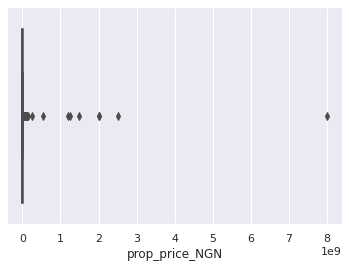

In [15]:
# Viewing the dataset with anomaly
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
sns.boxplot(data.prop_price_NGN)
plt.show()

From the box plot, we can infer that there are anomalies on the right.

We will go ahead to define and fit the model:

In [16]:
random_state = np.random.RandomState(42)
# load model
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.05),random_state=random_state)
# fit the model on our price data
model.fit(data[['prop_price_NGN']])
# print parameters
print(model.get_params())

{'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F5FA6232AF0, 'verbose': 0, 'warm_start': False}


Now, we can score the data to obtain anomaly scores:

In [17]:
data['scores'] = model.decision_function(data[['prop_price_NGN']])

data['anomaly_score'] = model.predict(data[['prop_price_NGN']])

anomaly_count = len(data[data['anomaly_score']==-1])

anomaly_data = data[data['anomaly_score']==-1]
nonanomaly_data = data[data['anomaly_score']==1]
anomaly_data.sort_values(['scores'], ascending=True)[:5]

,prop_date,prop_price_NGN,State,Area,Bedroom,Bathroom,Toilet,scores,anomaly_score
5460,2022-08-31,8000000000,Lagos,Victoria Island (VI),3,3,4,-0.284743,-1
2624,2022-08-25,2500000000,Lagos,Lekki,2,2,3,-0.279477,-1
8299,2022-09-02,2000000000,Lagos,Lekki,2,2,2,-0.277728,-1
8479,2022-08-18,2000000000,Lagos,Lekki,1,1,2,-0.277728,-1
8332,2022-08-31,1500000000,Lagos,Ajah,3,3,3,-0.275403,-1


In [18]:
anomaly_count

540

In [19]:
# Save both anomaly data and non-anomaly data to csv
anomaly_data.to_csv("drive/MyDrive/Data Science and ML projects/Nigerian State Relocation Guide Data/price_anomalies.csv",index=False)
nonanomaly_data.to_csv("drive/MyDrive/Data Science and ML projects/Nigerian State Relocation Guide Data/without_price_anomalies.csv",index=False)

## 2. Exploratory Data Analysis

Wow! 😅 We have come a long way!! We have been able to scrape our data and clean it for analysis. It is time to dig in and gain some useful insight from our data. Although, my initial plan was to look at all the States in Nigeria, but unfortunately, we could only get few States from our data. Fortunately though, we got enough data for the major cities in Nigeria. As a result of this, we would go ahead to only look at these cities, while keeping in mind as a next step in future, to look at other web platforms we could get additional data from, with other States inclusive. Bringing back our to-do EDA list, we are once again looking at:

  - Is there any relationship between price and facilities?
  - Does time of the year have an effect on apartment rental price in a particular State? (Using Abuja as case study). If so, what is the best time of the year to relocate to a particular State in Nigeria?
  - Apartment Prices by States in Nigeria - top and least most expensive States in Nigeria.
  - Apartment Prices by Areas in Nigeria - top and least most expensive Areas in Nigeria.
  - Median Rental Price grouped by Area, identifying the most and least expensive place/neighbourhood in Abuja, Nigeria
  - Median Rental Price by number of bedroom (with a focus on 1, 2, 3 and 4 bedrooms) grouped by Area.
  
Let's load our data and get to work 👍

In [143]:
# Importing relevant packages for our analysis
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [21]:
# Loading our data and parsing date to prop_date
df_load = pd.read_csv("drive/MyDrive/Data Science and ML projects/Nigerian State Relocation Guide Data/without_price_anomalies.csv",
                 parse_dates=['prop_date'])
df_load.drop(["scores", "anomaly_score"], axis=1, inplace=True)
df_load.head()

,prop_date,prop_price_NGN,State,Area,Bedroom,Bathroom,Toilet
0,2022-09-06,3000000,Lagos,Lekki,2,2,3
1,2022-07-06,1750000,Lagos,Ajah,2,2,2
2,2022-09-20,1800000,Lagos,Lekki,2,2,3
3,2022-08-06,10000000,Lagos,Ikoyi,3,3,3
4,2022-09-20,700000,Lagos,Ajah,1,1,2


In [22]:
# Adding datetime parameters for prop_date column
df_load.sort_values(by=["prop_date"], inplace=True, ascending=True)
df_load["propYear"] = df_load.prop_date.dt.year
df_load["propMonth"] = df_load.prop_date.dt.month
df_load["propDay"] = df_load.prop_date.dt.day
df_load["propWeek"] = df_load.prop_date.dt.isocalendar().week

In [4]:
df_load.head()

,prop_date,prop_price_NGN,State,Area,Bedroom,Bathroom,Toilet,propYear,propMonth,propDay,propWeek
10937,2020-09-21,350000,Lagos,Epe,2,3,3,2020,9,21,39
3327,2020-09-21,500000,Lagos,Epe,2,3,3,2020,9,21,39
10502,2020-09-22,8500000,Lagos,Ikoyi,2,2,3,2020,9,22,39
10787,2020-09-26,5000000,Lagos,Ikoyi,2,2,3,2020,9,26,39
10694,2020-09-28,10000000,Lagos,Victoria Island (VI),3,3,4,2020,9,28,40


Now that we have enriched our dataframe with date time features, we can remove prop_date.

In [23]:
# Copy our df dataframe into a new dataframe and drop the prop_date
df = df_load.copy()
df.drop("prop_date", axis=1, inplace=True)
df.head()

,prop_price_NGN,State,Area,Bedroom,Bathroom,Toilet,propYear,propMonth,propDay,propWeek
11474,350000,Lagos,Epe,2,3,3,2020,9,21,39
3542,500000,Lagos,Epe,2,3,3,2020,9,21,39
11003,8500000,Lagos,Ikoyi,2,2,3,2020,9,22,39
9729,15000000,Lagos,Ikoyi,3,3,4,2020,9,26,39
11315,5000000,Lagos,Ikoyi,2,2,3,2020,9,26,39


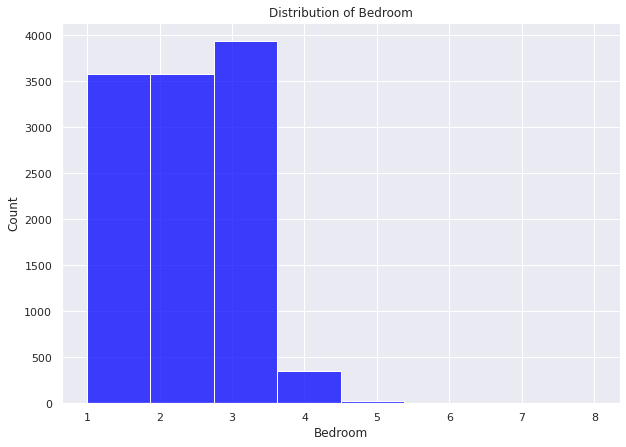

In [24]:
# Distribution of bedroom in our dataframe
plt.figure(figsize=(10,7))
sns.histplot(df.Bedroom, bins=8, color='blue')
plt.title("Distribution of Bedroom");

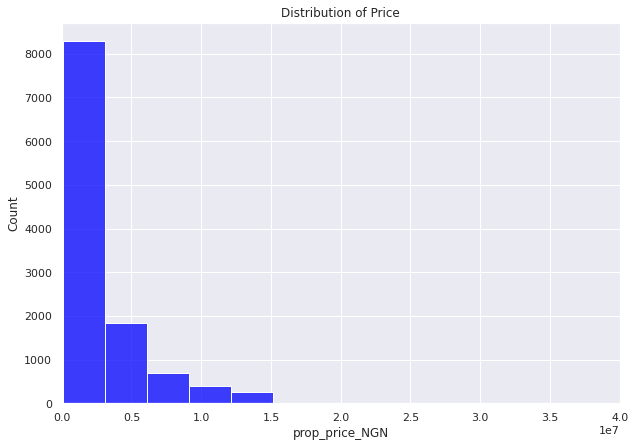

In [25]:
# Distribution of price in our dataframe
plt.figure(figsize=(10,7))
sns.histplot(df.prop_price_NGN, bins=5, color='blue')
plt.title("Distribution of Price")
plt.xlim([0,40000000]);

We are only going to be working with the major cities where we have at least more than 50 rows of data to have enough data that is representative of each State.

In [26]:
# Generate list for States greater than 50
vc_state = df.State.value_counts()
vc_state = vc_state[vc_state > 50].index
vc_state

Index(['Lagos', 'Abuja', 'Ogun', 'Rivers'], dtype='object')

To have a better representation, we would be selecting states that have more than 50 records. This leaves us with only 4 States (Lagos, Abuja, Ogun and Rivers).

In [27]:
# Select State that has more than 50 records
df = df[df["State"].isin(vc_state)]
df.State.value_counts()

Lagos     9884
Abuja     1228
Ogun       162
Rivers      96
Name: State, dtype: int64

Looking at the histogram plot for distribution of bedroom, we have very small value for some room categories, most especially room 5 - 8. We will drop them any records of bedroom categories that have counts less than 20.

In [28]:
# Generate list for bedrooms greater than or equal 20
vc_bedroom = df.Bedroom.value_counts()
vc_bedroom = vc_bedroom[vc_bedroom >= 20].index
vc_bedroom = vc_bedroom.max()
vc_bedroom

5

In [29]:
# Slice our dataframe to only select bedrooms within the maximum category with more than 20 records and below
df = df[df["Bedroom"]<=vc_bedroom]
df.Bedroom.value_counts()

3    3906
1    3546
2    3541
4     345
5      26
Name: Bedroom, dtype: int64

In [30]:
df[["prop_price_NGN", "Bedroom", "Bathroom", "Toilet"]].describe()

,prop_price_NGN,Bedroom,Bathroom,Toilet
count,1.136400e+04,11364.000000,11364.000000,11364.000000
mean,2.946345e+06,2.099261,2.214537,2.776047
std,3.033838e+06,0.887693,0.963606,1.170610
min,1.200000e+05,1.000000,1.000000,1.000000
25%,1.000000e+06,1.000000,1.000000,2.000000
50%,1.800000e+06,2.000000,2.000000,3.000000
75%,3.500000e+06,3.000000,3.000000,4.000000
max,1.515000e+07,5.000000,7.000000,7.000000


In [31]:
df.groupby("State")["prop_price_NGN"].agg([np.mean,np.median,min,max])

,mean,median,min,max
State,,,,
Abuja,3.167434e+06,2750000.0,125000,15000000
Lagos,2.975568e+06,1800000.0,120000,15150000
Ogun,5.740741e+05,500000.0,120000,1700000
Rivers,1.096947e+06,800000.0,140000,3500000


### 2.1 Relationship between price and facilities

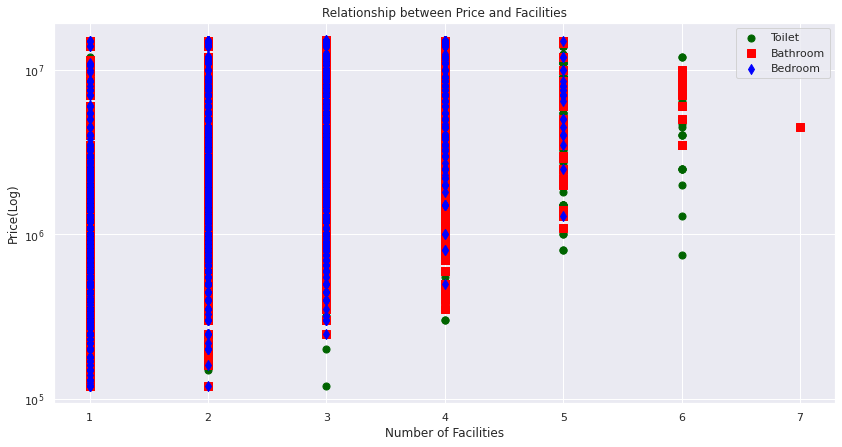

In [35]:
# Check the relationship between price, bedroom, bathroom and toilet with scatterplot
plt.figure(figsize=(14,7))
plt.scatter(df.Toilet, df.prop_price_NGN, marker ="o", s = 50, c="DarkGreen")
plt.scatter(df.Bathroom, df.prop_price_NGN, marker ="s", s = 50, c="red")
plt.scatter(df.Bedroom, df.prop_price_NGN, marker ="d", s = 50, c="blue")
plt.yscale('log')
plt.title("Relationship between Price and Facilities")
plt.xlabel("Number of Facilities")
plt.ylabel("Price(Log)")
plt.legend(["Toilet", "Bathroom", "Bedroom"])
plt.show();

As expected, the more the number of room increases, the higher the rental value. Although, we stopped at 4 bedrooms, but some of the 4 bedrooms are known to have more than 4 toilets or bathrooms, which also affects their value, even though not significant for 6 toilets or bathrooms. Let's have a proper view on the rental price by bedroom, using a boxplot.

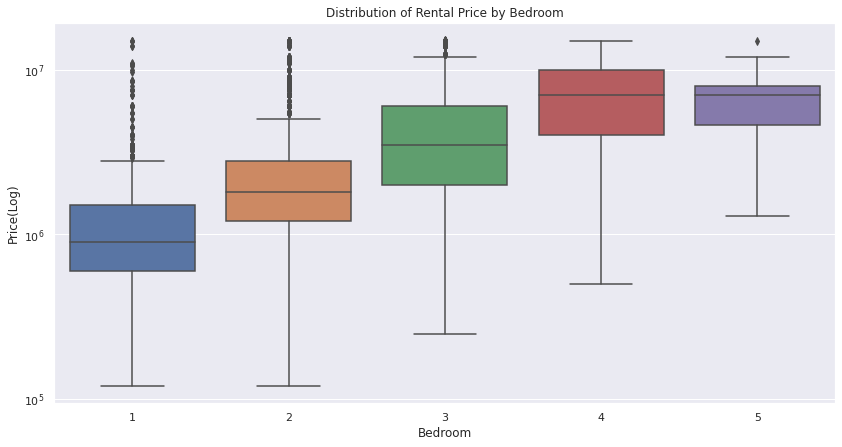

In [85]:
# Check distribution of rental price by Bedroom
plt.figure(figsize=(14,7))
sns.boxplot(x="Bedroom", y="prop_price_NGN", data=df)
plt.yscale("log")
sns.set(rc = {'figure.figsize':(14,7)})
plt.title("Distribution of Rental Price by Bedroom")
plt.xlabel("Bedroom")
plt.ylabel("Price(Log)");

### 2.2 Time of the Year in Relation to Price per Area and Number of Bedroom
Rather than checking by Area alone, it is possible specific number of bedrooms were listed than the others, which could affect the trend, so we will filter and chart based on these two features. I will go ahead to define a function to easily help us specify an area and number of bedroom, and get the relationship of rental price in that area based on time of the year. The aim here is to find out if time of the year affect rental price in this area. 

We will start by looking at the number of records we have per area in a particular state in our dataframe first.

In [306]:
def Areas_in_State(State):
  Areas_in_State = df[df["State"]==State].Area.value_counts()
  return Areas_in_State.plot(kind="bar",
                             ylabel="Count of housing listed",
                             xlabel = "Areas");

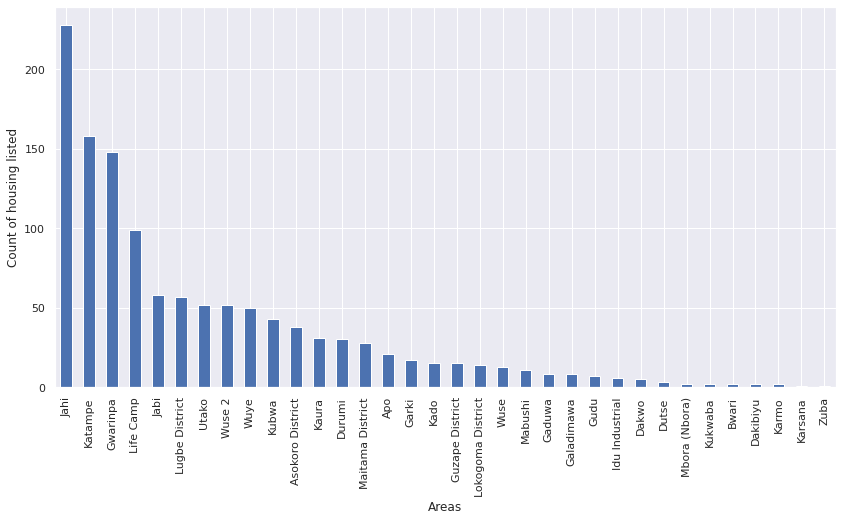

In [308]:
Areas_in_State(State="Abuja");

Now that we have the list of the areas in the State specified from the above chart, we can now look at the specific area and number of bedroom we want and confirm how the price fluctuates throughout the year. Focus would be on Jahi, Katampe and Gwarinpa since we have more than 100 records listed. Would be defining a function to help with this plot.

In [319]:
# Plot of median and mean rental price by State and Area per Month for 1 - 3 Bedrooms
def Area_rp_by_month(State, Area):
  # Sub by State first, as 2 different States may have areas with similar names
  df_state_sub = df[df["State"]==State]

  # Sub by Area
  df_area_sub = df_state_sub[df_state_sub["Area"]==Area]

  # Sub Area for 1 bedroom and group by mean and median
  df_area_bed1_sub = df_area_sub[df_area_sub["Bedroom"]==1]
  df_area_bed1_sub = df_area_bed1_sub.groupby("propMonth")["prop_price_NGN"].agg([np.mean,np.median])

  # Sub Area for 2 bedroom and group by mean and median
  df_area_bed2_sub = df_area_sub[df_area_sub["Bedroom"]==2]
  df_area_bed2_sub = df_area_bed2_sub.groupby("propMonth")["prop_price_NGN"].agg([np.mean,np.median])

  # Sub Area for 3 bedroom and group by mean and median
  df_area_bed3_sub = df_area_sub[df_area_sub["Bedroom"]==3]
  df_area_bed3_sub = df_area_bed3_sub.groupby("propMonth")["prop_price_NGN"].agg([np.mean,np.median])

  # Plot top and bottom 10
  fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1,
                               figsize=(10, 10),
                               sharex=True)  
  fig.suptitle(f'Rental Price of 1 - 3 Bedrooms by Month at {Area}, {State}')

  ax0.set_title('1 bedroom')
  df_area_bed1_sub.plot(ylabel = "Rental Price", ax=ax0)

  ax1.set_title('2 bedrooms')
  df_area_bed2_sub.plot(ylabel = "Rental Price", ax=ax1)

  ax2.set_title('3 bedrooms')
  df_area_bed3_sub.plot(ylabel = "Rental Price", ax=ax2);

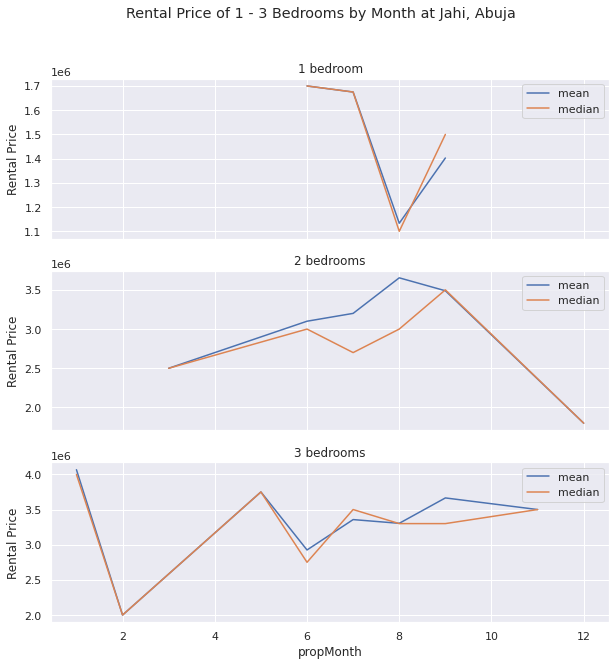

In [320]:
# Area Rental Price of 1-4 bedrooms in Jahi Abuja
Area_rp_by_month(State="Abuja", Area="Jahi")

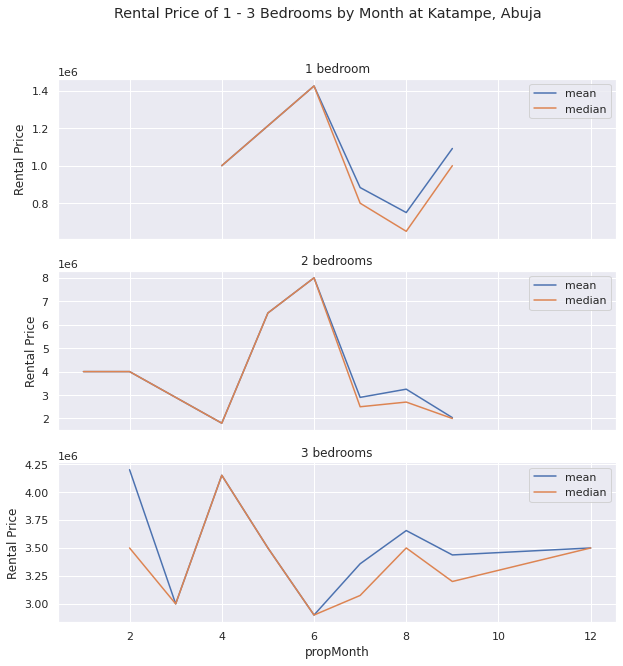

In [321]:
# Area Rental Price of 1-4 bedrooms in Katampe Abuja
Area_rp_by_month(State="Abuja", Area="Katampe")

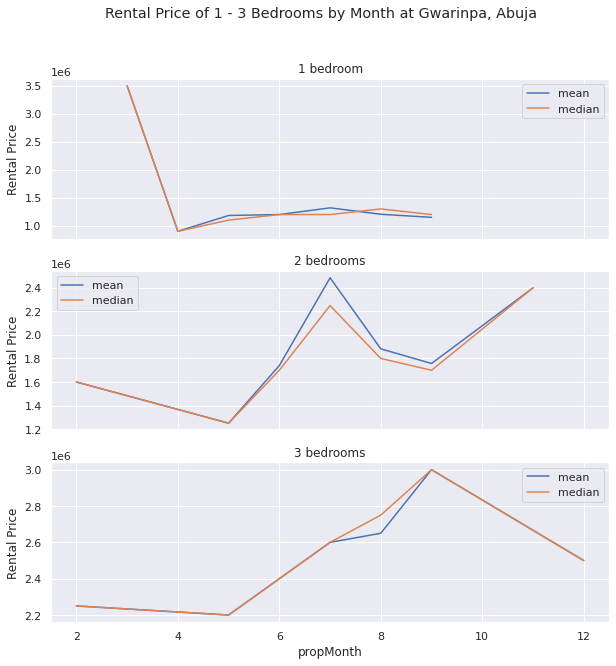

In [322]:
# Area Rental Price of 1-4 bedrooms in Gwarinpa Abuja
Area_rp_by_month(State="Abuja", Area="Gwarinpa")

### 2.3 Apartment Prices by States in Nigeria

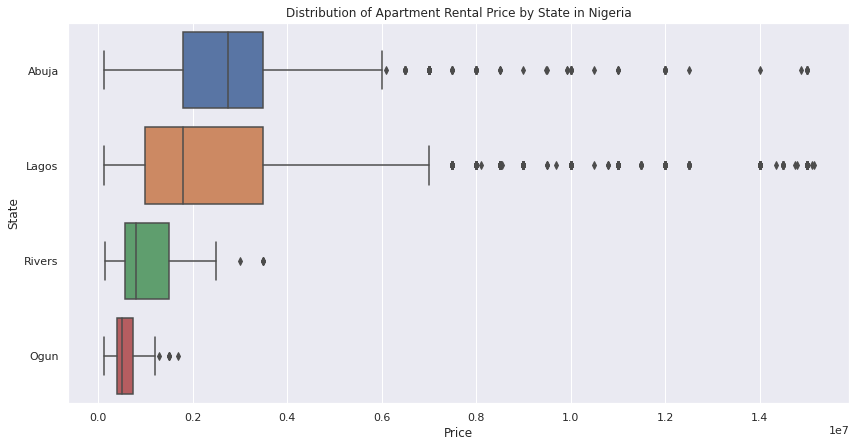

In [146]:
# Check distribution of rental price by State starting from the most expensive
grouped = df.groupby("State")["prop_price_NGN"].agg(np.median)
order = grouped.sort_values(ascending=False).index
sns.boxplot(x="prop_price_NGN", y="State", data=df, order=order)
#plt.xscale("log")
sns.set(rc = {'figure.figsize':(14,7)})
plt.title("Distribution of Apartment Rental Price by State in Nigeria");
plt.xlabel("Price");

Above gives a representation of the most expensive in terms of apartment rent in Nigeria. However, we will use bar charts to show clearly the mean and median of apartment rent fees in these States, to have a better understanding of how much the average and the middle price is.

Nonetheless, according to [herefordshire UK](https://understanding.herefordshire.gov.uk/media/1389/why_do_we_use_the_median_figure_for_house_prices_and_earnings.pdf), the median is a more faithful representation of the prevalent house price than the mean, as
the latter is skewed by extreme values – you could work out a mean house price for the State, then if the next week a property costing a couple of million came on the market, the
mean price would shoot up. The median, however, would hardly be affected. Therefore, the median would be a better judge for our inference.

Based on the above, Abuja seems to be the most expensive in terms of the median price of an apartment. Let's have a better look with bar charts below.

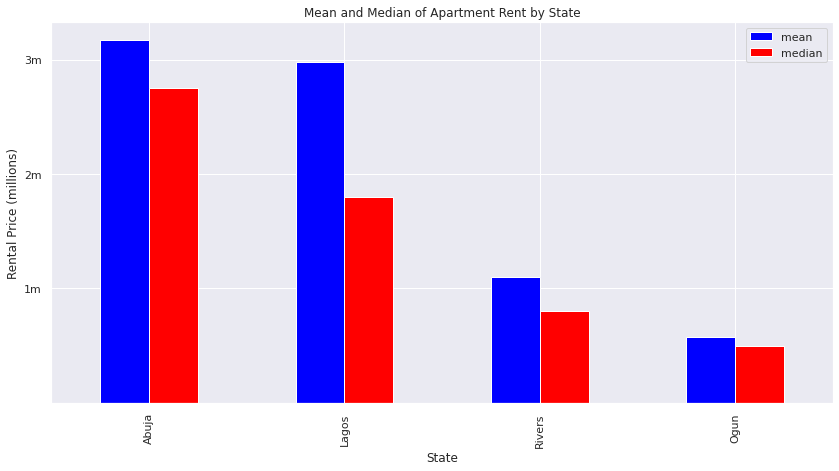

In [103]:
# Mean and Median of Apartment Rent Price by State
df_state = df.groupby("State")["prop_price_NGN"].agg([np.mean,np.median])
df_state.sort_values(by="mean", ascending=False).plot(kind="bar", figsize=(14,7),
                                                      ylabel = "Rental Price (millions)",
                                                      title="Mean and Median of Apartment Rent by State",
                                                      color =["blue", "red"])
tick_val = [1000000, 2000000, 3000000]
tick_lab = ['1m', '2m', '3m']
plt.yticks(tick_val, tick_lab)
plt.show();

#### 2.3.1 Apartment Prices by State and Number of Bedroom
Now that we know our most expensive State, let's dig deeper to look at the mean and median of this States by number of bedrooms. I will do this by defining a function that we can easily replicate to plot by different number of rooms.

In [104]:
# Define a function to plot mean and median by number of bedroom and State
def state_by_room_plot(df, column, nrooms, 
                       tick_val, 
                       tick_lab
                       ):
  '''
  Plots the mean and median based on number of rooms specified, and sorted by mean
  '''
  df_State_nroom = df[column == nrooms]
  df_State_nroom_group = df_State_nroom.groupby("State")["prop_price_NGN"].agg([np.mean,np.median])\
  .sort_values(by="mean", ascending=False)
  df_State_nroom_group.plot(kind="bar", figsize=(14,7),
                                   ylabel = "Rental Price (millions)",
                                   title=f'Mean and Median of {nrooms} Bedroom Apartment Price by State',
                                   color =["blue", "red"])
  plt.yticks(tick_val, tick_lab)
  return plt.show()

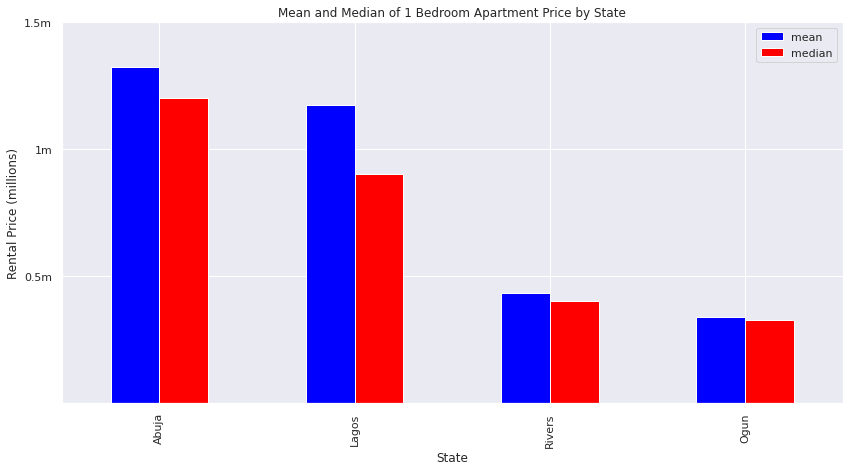

In [105]:
# Plot mean and median of 1 bedroom apartment price by State
state_by_room_plot(df, df.Bedroom, 1, 
                   tick_val = [500000, 1000000, 1500000], 
                   tick_lab = ['0.5m', '1m', '1.5m']);

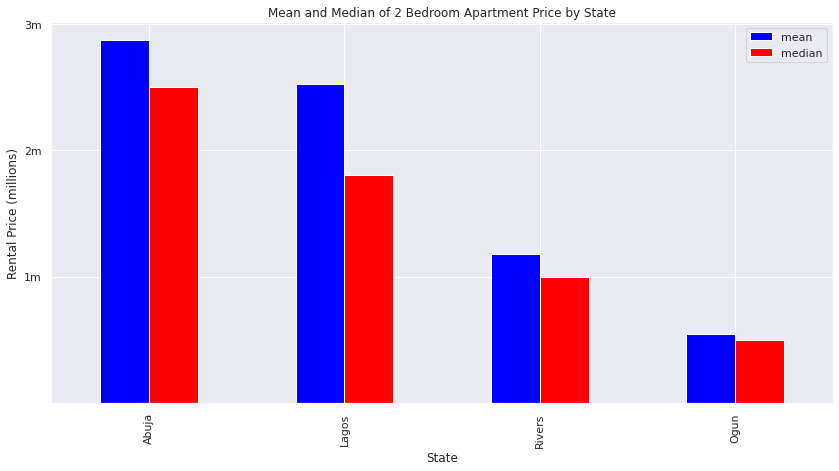

In [106]:
# Plot mean and median of 2 bedroom apartment price by State
state_by_room_plot(df, df.Bedroom, 2, 
                   tick_val = [1000000, 2000000, 3000000], 
                   tick_lab = ['1m', '2m', '3m']);

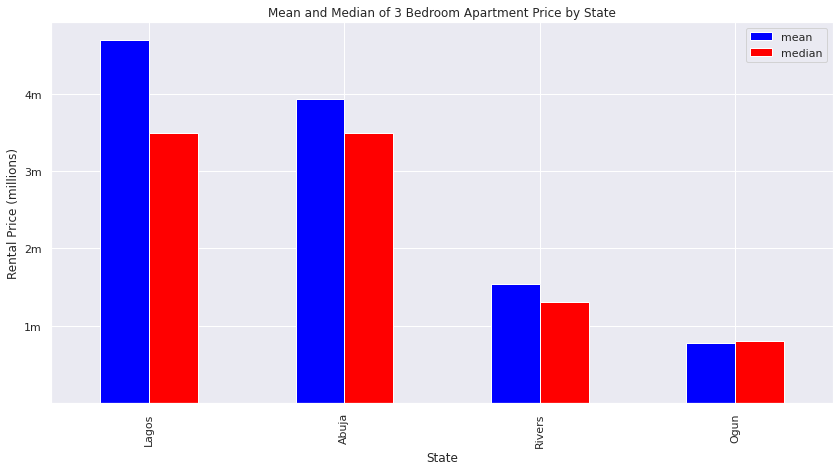

In [107]:
# Plot mean and median of 3 bedroom apartment price by State
state_by_room_plot(df, df.Bedroom, 3, 
                   tick_val = [1000000, 2000000, 3000000, 4000000], 
                   tick_lab = ['1m', '2m', '3m', '4m']);

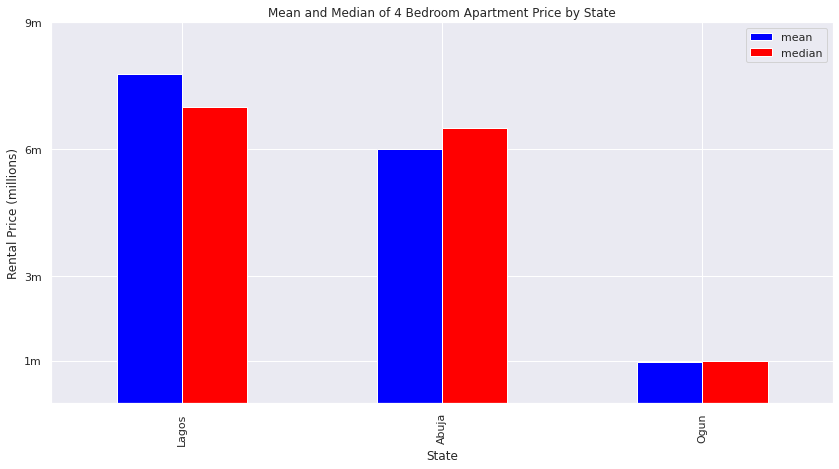

In [108]:
# Plot mean and median of 4 bedroom apartment price by State
state_by_room_plot(df, df.Bedroom, 4, 
                   tick_val = [1000000, 3000000, 6000000, 9000000], 
                   tick_lab = ['1m', '3m', '6m', '9m']);

Abuja remains the most expensive for 1 and 2 bedrooms based on the median rent, while it is about thesame for 3 bedrooms in Abuja and Lagos, while Lagos is just slightly more expensive than Abuja for median prices of 4 bedroom. We will go ahead to look at this by Area.

### 2.4 Apartment Prices by Different Areas Across Nigeria
Here we will be looking at the different areas in Nigeria, to show the most and least expensive.



#### 2.4.1 Top and Bottom 10 Areas by Apartment Price in Nigeria

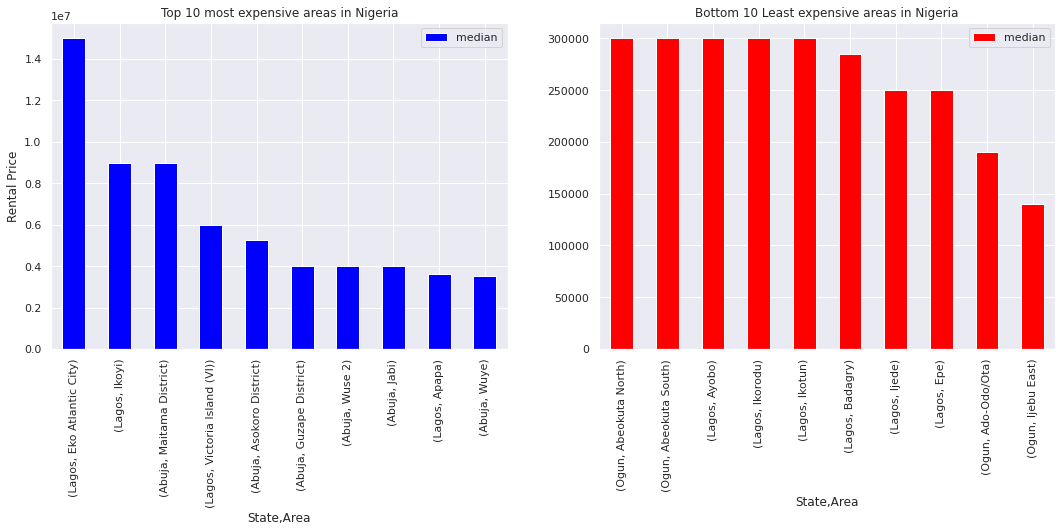

In [202]:
# Group df by State and Area aggregated and sorted by median price for top 10 and bottom 10
df_area = df.groupby(["State", "Area"])["prop_price_NGN"].agg([np.median])
df_area.sort_values(by="median", ascending=False, inplace=True)
df_area_top10 = df_area.head(10)
df_area_bottom10 = df_area.tail(10)

# Plot top and bottom 10
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,
                               figsize=(18, 6))

ax0.set_title('Top 10 most expensive areas in Nigeria')
df_area_top10.plot(kind="bar",
                   color =["blue"],
                   ylabel = "Rental Price",
                   ax=ax0)

ax1.set_title('Bottom 10 Least expensive areas in Nigeria')
df_area_bottom10.plot(kind="bar",
                   color =["red"],
                   ax=ax1);

From above chart, Eko Atlantic city in Lagos is the most expensive with a median price of `NGN15m` and a very huge gap compared to the two second highest, Ikoyi in Lagos and Maitama district in Abuja with a median price of `NGN9m`.Ijebu east in Ogun State has the lowest apartment rental price among all the States analysed. However, we still need to know by number of rooms, as this could have effect on our insight, based on data available.

#### 2.4.2 Top and Bottom 10 by Apartment Prices and Number of Bedrooms of Areas in Nigeria
Similarly, for our plots for areas, we are going to be using the median price to view the rental prices by area and bedroom. Before we do this, we would define a function to plot by area and bedroom.

In [254]:
# Define a function to plot top and bottom 10 different Areas Apartment price median by number of bedroom and State
def plot_top_bottom_area_by_bed(nrooms):
  df_area_bed = df[df["Bedroom"]==nrooms]
  df_area_bed = df_area_bed.groupby(["State", "Area"])["prop_price_NGN"].agg([np.median])
  df_area_bed.sort_values(by="median", ascending=False, inplace=True)
  df_area_bed_top10 = df_area_bed.head(10)
  df_area_bed_bottom10 = df_area_bed.tail(10)

  # Plot top and bottom 10
  fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,
                                figsize=(20, 5))

  ax0.set_title(f'Top 10 Expensive Areas by Median price of {nrooms} Bed Apartment in Nigeria')
  df_area_bed_top10.plot(kind="bar",
                    color =["blue"],
                    ylabel = "Price",
                    ax=ax0)

  ax1.set_title(f'Least 10 Expensive Areas by Median price of {nrooms} Bed Apartment in Nigeria')
  df_area_bed_bottom10.plot(kind="bar",
                    color =["red"],
                    ax=ax1);

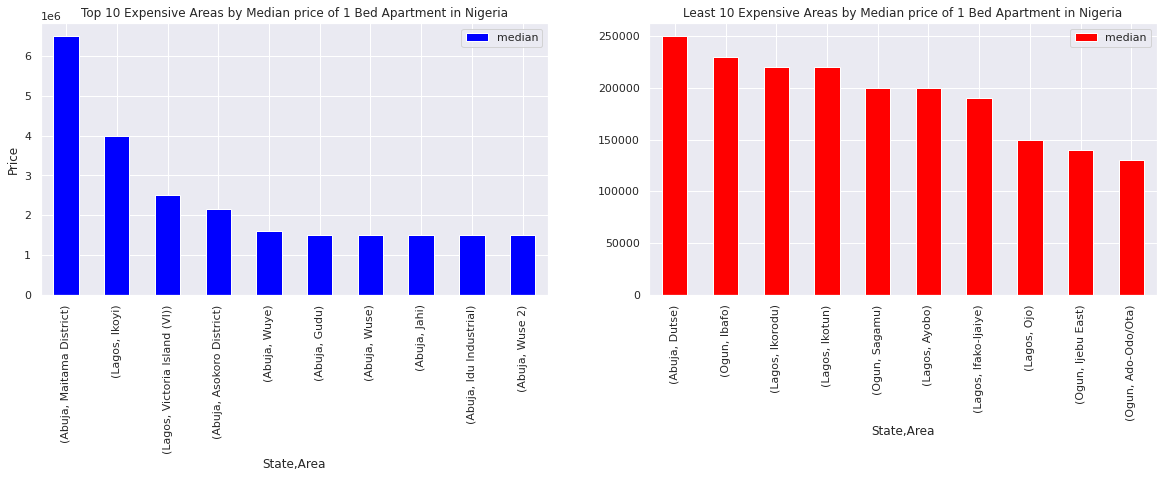

In [255]:
# Top 10 and least 10 by 1 bedroom apartment
plot_top_bottom_area_by_bed(1)

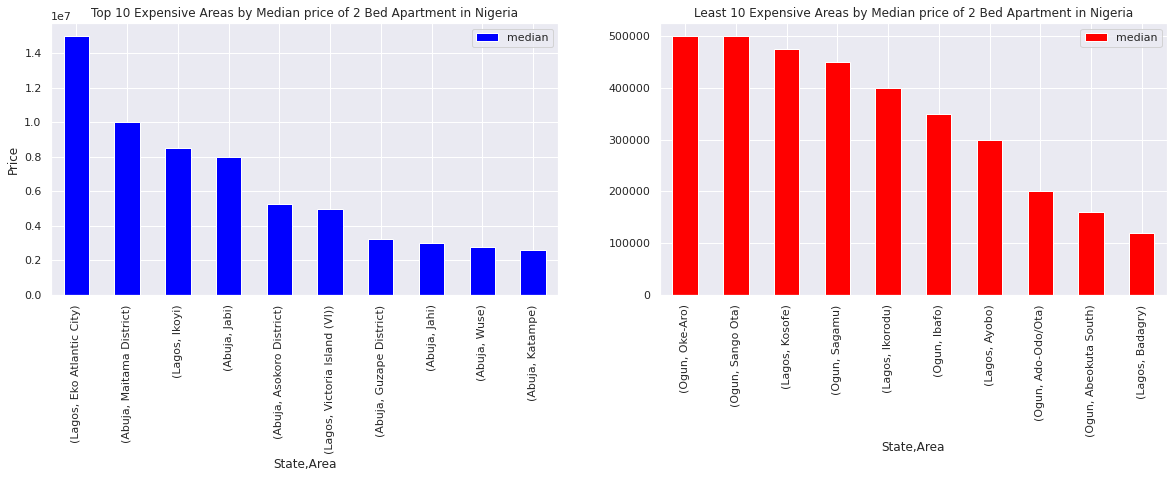

In [249]:
# Top 10 and least 10 by 2 bedroom apartment
plot_top_bottom_area_by_bed(2)

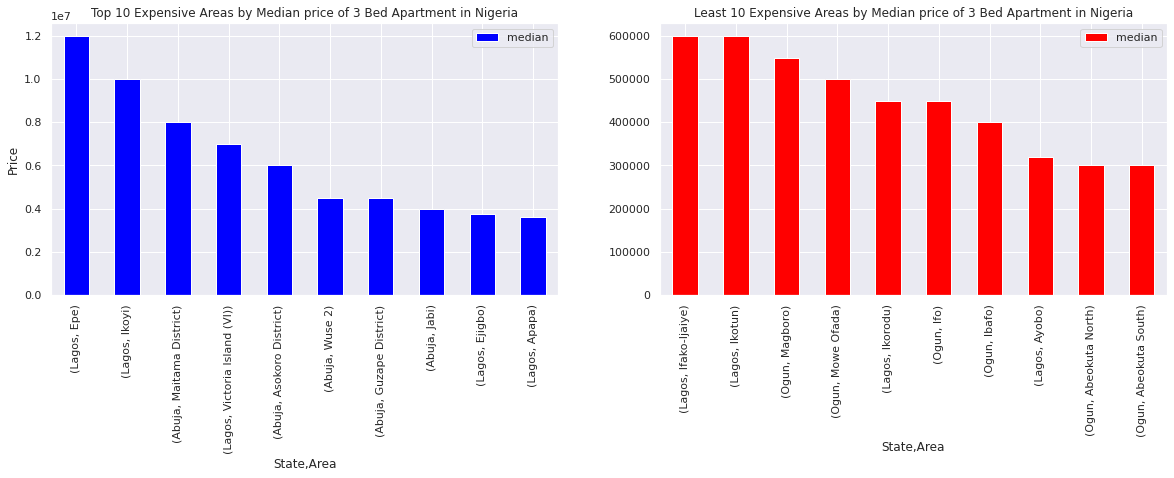

In [250]:
# Top 10 and least 10 by 3 bedroom apartment
plot_top_bottom_area_by_bed(3)

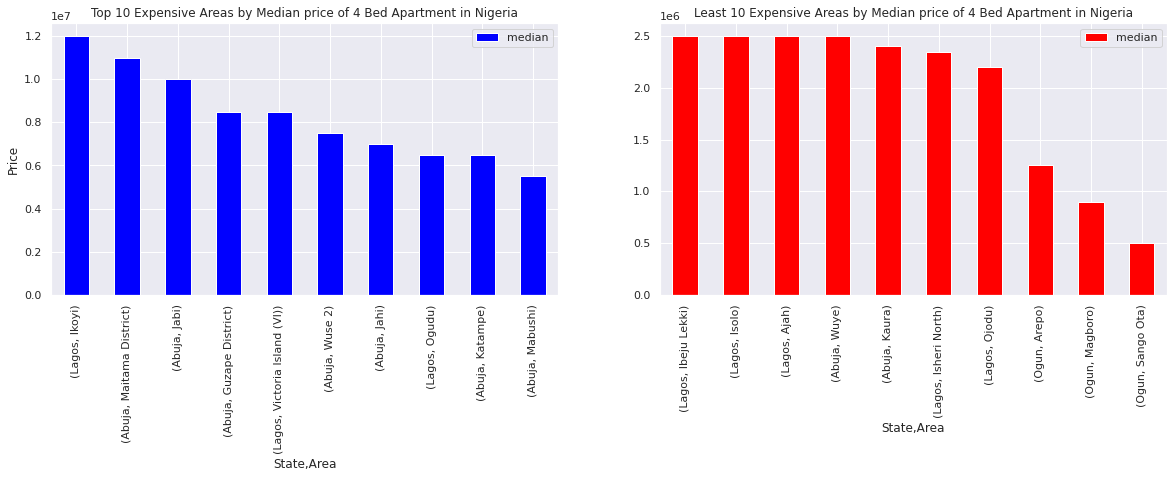

In [251]:
# Top 10 and least 10 by 4 bedroom apartment
plot_top_bottom_area_by_bed(4)

Based on the data we have, Maitama district in Abuja has the highest price for 1 bedroom, Eko Atlantic City in lagos for 2 bedrooms, Epe in Lagos for 3 bedrooms and Ikoyi in Lagos for 4 bedrooms.

#### 2.4.3 Apartment Prices in Different Areas of a Specific State (Focusing on Abuja)

Although I am going to be focusing on Abuja in this project, we would define a function to make it easy to plot for any specific State by number of bedroom, to enable us know the most expensive area or price distribtuion per area in a particular state.

In [274]:
# Check distribution of rental price by Bedroom and Area in a specific State
def State_rp_by_bedroom(State, Bedroom):
  # Sub by State and Bedroom
  df_state_sub = df[df["State"]==State]
  df_State_bed_sub = df_state_sub[df_state_sub["Bedroom"]==Bedroom]
  
  # Group by Area to order by the median price for our plot
  grouped =  df_State_bed_sub.groupby("Area")["prop_price_NGN"].agg(np.median)
  order = grouped.sort_values(ascending=False).index

  #Plot our sub
  fig, ax = plt.subplots(figsize=(15, 10))
  sns.boxplot(x="prop_price_NGN", y="Area", data=df_State_bed_sub, order=order, ax=ax)
  plt.title(f'Distribution of Apartment rental Price of {Bedroom} bedroom(s) by Areas in {State}')
  plt.xlabel("Price")
  plt.ylabel("Area");

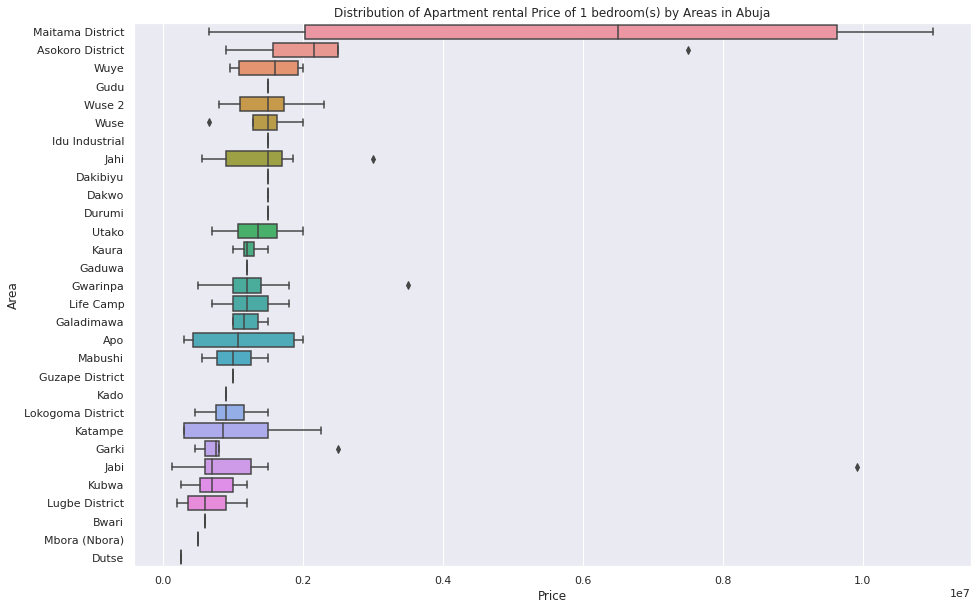

In [277]:
# Plot rental price in Abuja for 1 bedroom by Area
State_rp_by_bedroom(State="Abuja", Bedroom=1)

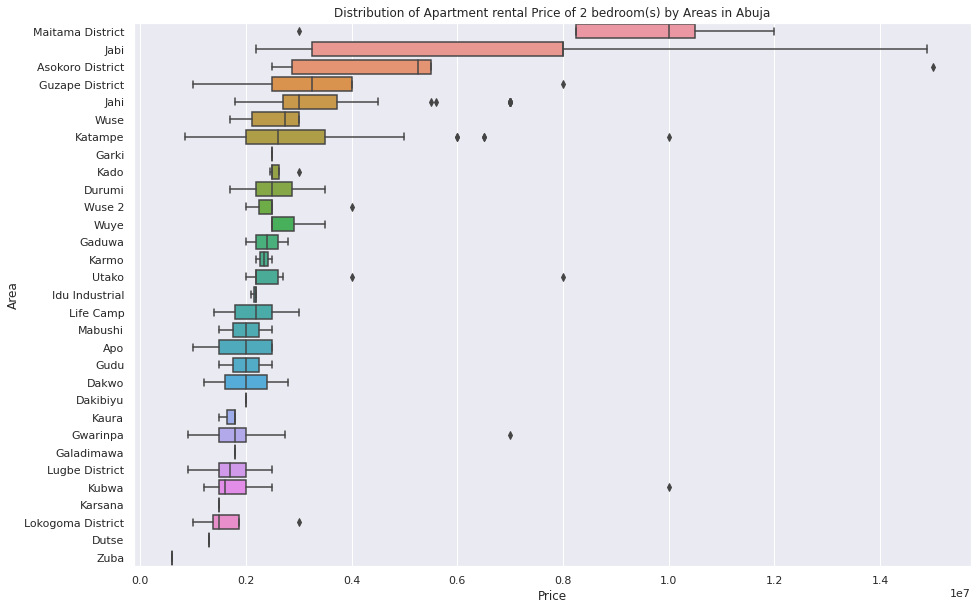

In [278]:
# Plot rental price in Abuja for 2 bedroom by Area
State_rp_by_bedroom(State="Abuja", Bedroom=2)

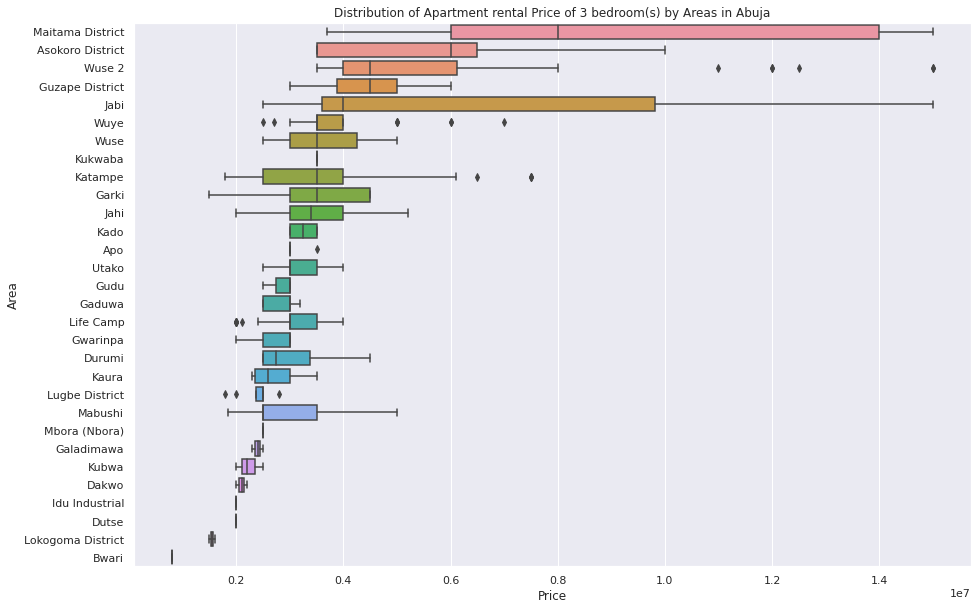

In [279]:
# Plot rental price in Abuja for 3 bedroom by Area
State_rp_by_bedroom(State="Abuja", Bedroom=3)

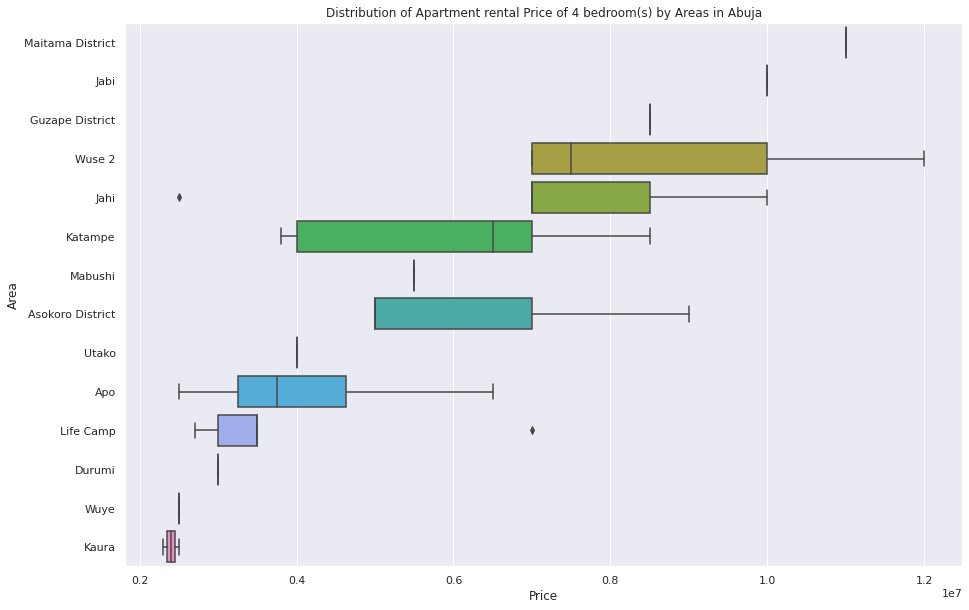

In [280]:
# Plot rental price in Abuja for 4 bedroom by Area
State_rp_by_bedroom(State="Abuja", Bedroom=4)

As expected, Maitama topped the list of all the different category of bedrooms specified in Abuja based on the median apartment price.

In [326]:
# Save our cleaned dataframe to csv to enable us load for prediction without rerunning eda
df_load.to_csv("drive/MyDrive/Data Science and ML projects/Nigerian State Relocation Guide Data/clean_property_with_dt.csv",index=False)
df.to_csv("drive/MyDrive/Data Science and ML projects/Nigerian State Relocation Guide Data/clean_property_without_dt.csv",index=False)

## 3. Predicting the price of an apartment

In [327]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [385]:
df_for_pred = pd.read_csv("drive/MyDrive/Data Science and ML projects/Nigerian State Relocation Guide Data/clean_property_without_dt.csv",
                 #parse_dates=['prop_date'],
                 usecols = ['State','Area','Bedroom','Bathroom','Toilet','propYear','prop_price_NGN']
                 )

### 3.1 Preprocessing our data

In [386]:
# View our data
df_for_pred.head()

,prop_price_NGN,State,Area,Bedroom,Bathroom,Toilet,propYear
0,350000,Lagos,Epe,2,3,3,2020
1,500000,Lagos,Epe,2,3,3,2020
2,8500000,Lagos,Ikoyi,2,2,3,2020
3,15000000,Lagos,Ikoyi,3,3,4,2020
4,5000000,Lagos,Ikoyi,2,2,3,2020


In [387]:
len(df_for_pred)

11364

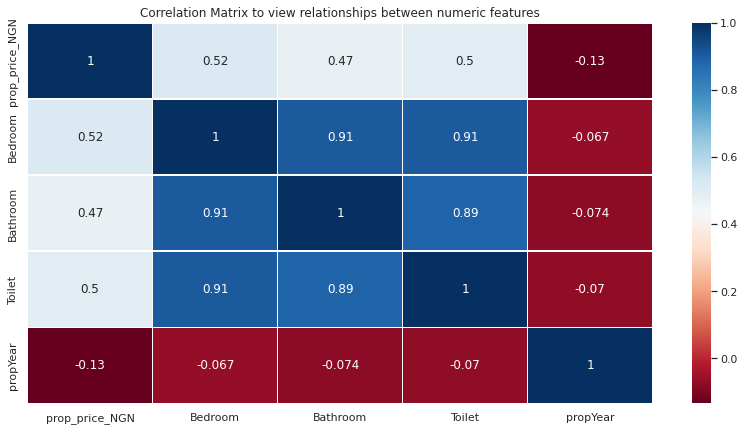

In [388]:
# Make a correlation matrix
corr_matrix = df_for_pred.corr()
fig,ax = plt.subplots(figsize=(14,7))
plt.title("Correlation Matrix to view relationships between numeric features")
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 cmap='RdBu');

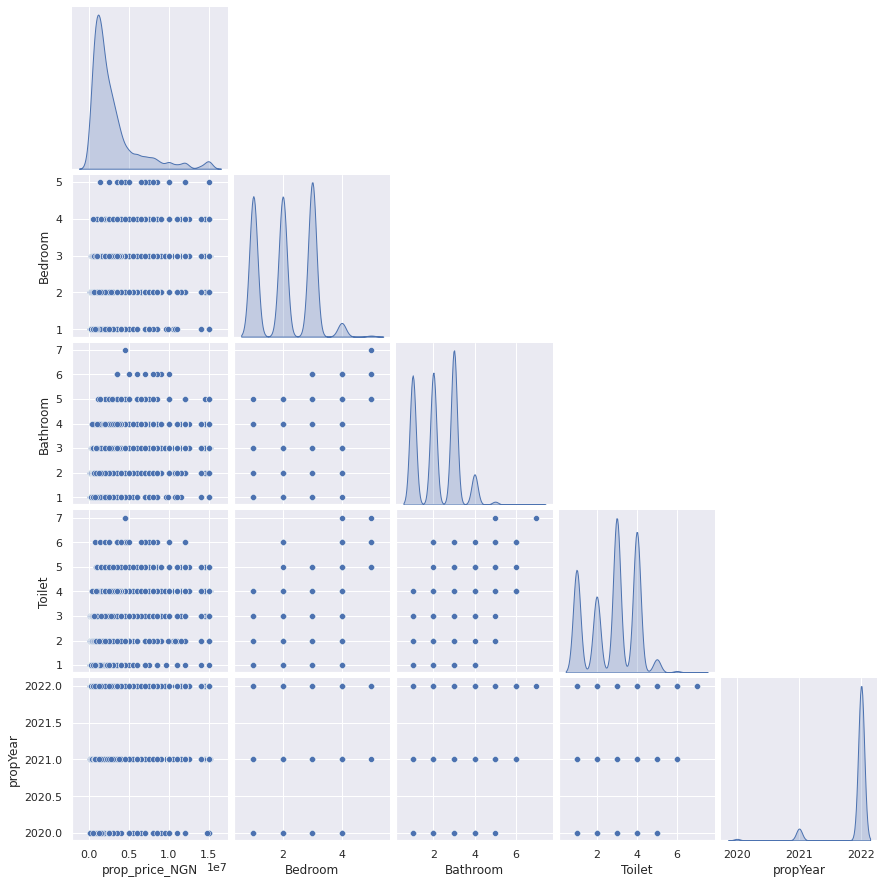

In [389]:
sns.pairplot(df_for_pred, diag_kind='kde', corner=True);

In [390]:
df_for_pred.dtypes

prop_price_NGN     int64
State             object
Area              object
Bedroom            int64
Bathroom           int64
Toilet             int64
propYear           int64
dtype: object

Before going ahead, we will convert our categorical columns into numbers, and in this case, we will be using the categorical conding method, since we have a lot of categories to deal with from State and Area column.

In [391]:
# Copy the dataset into a new one
dataset = df_for_pred.copy()
dataset.head()

,prop_price_NGN,State,Area,Bedroom,Bathroom,Toilet,propYear
0,350000,Lagos,Epe,2,3,3,2020
1,500000,Lagos,Epe,2,3,3,2020
2,8500000,Lagos,Ikoyi,2,2,3,2020
3,15000000,Lagos,Ikoyi,3,3,4,2020
4,5000000,Lagos,Ikoyi,2,2,3,2020


In [392]:
# Find the columns which contain strings
for label, content in dataset.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

State
Area


In [393]:
# Turn all string value into category values
for label, content in dataset.items():
    if pd.api.types.is_string_dtype(content):
        dataset[label] = content.astype('category').cat.as_ordered()

Now, under the hood, pandas will treat our categories as code, instead of strings, since we have converted them to category. Let's look at one of the column; state.

In [394]:
dataset.State.cat.codes.head(5)

0    1
1    1
2    1
3    1
4    1
dtype: int8

Above shows that for all the strings (unique) in each of the columns with labels, which we have specified, pandas has assigned a code to each of them, which we would use for our machine learning model. However, we still have a lot of missing data, which we would look at next. Once again, let's look at the percentage of missing data in each of our column.

In [395]:
# Turn categorical variables into numbers
for label, content in dataset.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        dataset[label] = pd.Categorical(content).codes+1

In [396]:
# Check for columns which aren't numeric and have null values
for label, content in dataset.items():
    if not pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [397]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11364 entries, 0 to 11363
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   prop_price_NGN  11364 non-null  int64
 1   State           11364 non-null  int8 
 2   Area            11364 non-null  int8 
 3   Bedroom         11364 non-null  int64
 4   Bathroom        11364 non-null  int64
 5   Toilet          11364 non-null  int64
 6   propYear        11364 non-null  int64
dtypes: int64(5), int8(2)
memory usage: 466.2 KB


In [398]:
# Splitting our dataset
train_dataset = dataset.sample(frac=0.8, random_state=42)
test_dataset = dataset.drop(train_dataset.index)

X_train = train_dataset.drop("prop_price_NGN", axis=1)
X_test = test_dataset.drop("prop_price_NGN", axis=1)

y_train = train_dataset["prop_price_NGN"]
y_test = test_dataset["prop_price_NGN"]

### 3.2 Experimenting with Different Models
To make our experimentation cleaner and easy for us to find the best model, we will be writing few lines of code to iterate the process, and sort by the best model. This way, we can focus on tuning the parameters of the best model for use.

In [399]:
def best_reg_model(X_train,y_train,X_test,y_test):
  # Import our metrics
  from sklearn.metrics import r2_score
  from sklearn.metrics import mean_squared_error
  
  # Import our models for regression
  from sklearn.linear_model import LinearRegression
  from sklearn.linear_model import Ridge
  from sklearn.linear_model import ElasticNet
  from sklearn.linear_model import BayesianRidge
  from sklearn.linear_model import ARDRegression
  from sklearn.svm import SVR
  from sklearn.svm import NuSVR
  from sklearn.svm import LinearSVR
  from sklearn.ensemble import BaggingRegressor
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.ensemble import ExtraTreesRegressor
  from sklearn.ensemble import AdaBoostRegressor
  from sklearn.ensemble import HistGradientBoostingRegressor
  from sklearn.ensemble import GradientBoostingRegressor

  # Put our regression models in two-dimensional list
  models = [
      ["LinearRegression", LinearRegression],
      ["Ridge", Ridge],
      ["ElasticNet", ElasticNet],
      ["BayesianRidge", BayesianRidge],
      ["ARD", ARDRegression],
      ["SVR", SVR],
      ["NuSVR", NuSVR],
      ["LinearSVR", LinearSVR],
      ["BaggingRegressor", BaggingRegressor],
      ["RandomForestRegressor", RandomForestRegressor],
      ["ExtraTreesRegressor", ExtraTreesRegressor],
      ["AdaBoostRegressor", AdaBoostRegressor],
      ["HistGradientBoostingRegressor", HistGradientBoostingRegressor],
      ["GradientBoostingRegressor", GradientBoostingRegressor]
  ]

  # Use a Nested loop through each algorithm and append each model and score to insight
  insights = []
  for modelname, Model in models:
      model = Model()
      model.fit(X_train, y_train)
      train_preds = model.predict(X_train)
      test_preds = model.predict(X_test)
      train_score = r2_score(y_train, train_preds)
      test_score = r2_score(y_test, test_preds)
      #score2 = mean_squared_error(y_true = y_test, y_pred = y_preds)
      #score = model.score(X_test, y_test)
      insights.append((modelname, np.around(test_score,5), np.around(train_score,5)))

  # Sort to get the top 5 performing model-parameter pair and plot
  insights = pd.DataFrame(insights, columns=['Model','Test score','Train score'])
  insights = insights.sort_values(['Test score'], ascending=False).reset_index(drop=True)
  return insights[:5]

In [400]:
%%time
best_reg_model(X_train,y_train,X_test,y_test)

CPU times: user 21 s, sys: 707 ms, total: 21.7 s
Wall time: 20.7 s


,Model,Test score,Train score
0,HistGradientBoostingRegressor,0.76115,0.76603
1,RandomForestRegressor,0.75299,0.78097
2,BaggingRegressor,0.75131,0.78024
3,ExtraTreesRegressor,0.74735,0.78386
4,GradientBoostingRegressor,0.74379,0.74814


Our model has performed fairly nice on the first baseline experiment. Although `HistGradientBoostingRegressor` topped, it was just with a slight difference (insignificant) compared with other top 5 models. Ideally, the closer to 1, the better and with hyperparameter tuning, we might get closer to that. `RandomForestRegressor` which is the second on the list, has a better train R2 score of 0.78097, with a test R2 score of 0.75299. So, I would rather go with this for hyperparameter tuning.

### 3.3 Hyperparameter Tuning with RandomizedSearchCV

We will first create an evaluation function for our randomized search model.

In [403]:
# Create evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    '''
    calculate root mean squared log error between predictions and true labels.
    '''
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model,X_train,y_train,X_test,y_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {'Training MAE': mean_absolute_error(y_train, train_preds),
              'Test MAE': mean_absolute_error(y_test, test_preds),
              #'Training RMSLE': rmsle(y_train, train_preds),
              #'Test RMSLE': rmsle(y_test, test_preds),
              'Training R^2': r2_score(y_train, train_preds),
              'Test R^2': r2_score(y_test, test_preds),}
    return scores

In [401]:
# View the hyperparameters in RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 3.4 Implementing our RandomizedSearchCV

In [404]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters to tune
rf_grid = {'n_estimators': np.arange(10, 100, 10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2),
           'max_features': [0.5, 1, 'sqrt', 'auto']}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 55.7 s, sys: 2.7 s, total: 58.4 s
Wall time: 2min 15s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [405]:
show_scores(rs_model, X_train, y_train, X_test, y_test)

{'Training MAE': 825130.8759078347,
 'Test MAE': 871677.7119763864,
 'Training R^2': 0.773570544940813,
 'Test R^2': 0.7528198352738875}

In [406]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

Our RandomizedSearchCV did not do any better in comparison to our baseline. Since some these parameters remain thesame as the default even after using the randomizedsearchcv, we will remove them from our grid and increase the level of search for other parameters.

In [407]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters to tune
rf_grid2 = {'n_estimators': np.arange(10, 500, 10),
           'min_samples_split': np.arange(2, 50, 2),
           'min_samples_leaf': np.arange(1, 50, 2)}

# Instantiate RandomizedSearchCV model
rs_model2 = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid2,
                              n_iter=100,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model2.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 3min 16s, sys: 9.37 s, total: 3min 26s
Wall time: 8min 23s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490])},
                   verbose=True)

In [408]:
show_scores(rs_model2, X_train, y_train, X_test, y_test)

{'Training MAE': 825119.6957070364,
 'Test MAE': 870355.2899707702,
 'Training R^2': 0.7738917128310994,
 'Test R^2': 0.75361460950688}

In [409]:
# Find the best model hyperparameters
rs_model2.best_params_

{'n_estimators': 410, 'min_samples_split': 12, 'min_samples_leaf': 1}

After series of randomizedsearchcv experimentation, we keep getting similar results with our baseline model. Probably with more data, our model should be able to perform better.

### Next Steps on Price Prediction:
- Collect more data to build our model for price prediction
- Get extra features that may be useful for accurate prediction. Unfortunately, we do not have enough features to extract from the website we scraped our data.

## 4. Building a Custom Search Function

In [410]:
# Load our dataset
import pandas as pd
cols = ['State','Area','Bedroom','Bathroom','prop_price_NGN']
df_for_rec = pd.read_csv("drive/MyDrive/Data Science and ML projects/Nigerian State Relocation Guide Data/without_price_anomalies.csv",
                 usecols = cols)
df_for_rec = df_for_rec[cols]
df_for_rec

,State,Area,Bedroom,Bathroom,prop_price_NGN
0,Lagos,Lekki,2,2,3000000
1,Lagos,Ajah,2,2,1750000
2,Lagos,Lekki,2,2,1800000
3,Lagos,Ikoyi,3,3,10000000
4,Lagos,Ajah,1,1,700000
...,...,...,...,...,...
11470,Lagos,Victoria Island (VI),3,3,8000000
11471,Lagos,Ajah,3,3,1200000
11472,Lagos,Ikeja,2,2,4000000
11473,Lagos,Ikoyi,4,4,15000000


In [411]:
df_for_rec.describe()

,Bedroom,Bathroom,prop_price_NGN
count,11475.000000,11475.000000,1.147500e+04
mean,2.102571,2.218388,2.928713e+06
std,0.894382,0.969588,3.030268e+06
min,1.000000,1.000000,1.200000e+05
25%,1.000000,1.000000,1.000000e+06
50%,2.000000,2.000000,1.800000e+06
75%,3.000000,3.000000,3.500000e+06
max,8.000000,8.000000,1.515000e+07


To build our engine, we will group our data by State, Area, Bedroom, Bathroom and Toilet, returning the median price of each unique group. We will be using Median Price, to help prevent exaggerated figures of an apartment as a result of outliers.

In [412]:
df_rec_grp = df_for_rec.groupby(['State', 'Area', 'Bedroom', 'Bathroom'], as_index=False).median()
df_rec_grp.rename(columns = {'prop_price_NGN':'Median_Rent_NGN'}, inplace = True)
df_rec_grp["Median_Rent_NGN"] = df_rec_grp["Median_Rent_NGN"].astype(int)
df_rec_grp

,State,Area,Bedroom,Bathroom,Median_Rent_NGN
0,Abuja,Apo,1,1,650000
1,Abuja,Apo,1,2,1500000
2,Abuja,Apo,2,2,1500000
3,Abuja,Apo,2,3,2500000
4,Abuja,Apo,3,3,3000000
...,...,...,...,...,...
534,Rivers,Port Harcourt,2,3,600000
535,Rivers,Port Harcourt,3,3,1400000
536,Rivers,Port Harcourt,3,4,600000
537,Rivers,Port Harcourt,5,5,1300000


In [413]:
# Write a filter function to search based on criteria
def search(State, Bedroom, budget, top_n=10):
  results_State = df_rec_grp[df_rec_grp["State"] == State]
  results_Bedroom =  results_State[results_State["Bedroom"] == Bedroom]
  min_budget = budget * 0.8
  results_rent = results_Bedroom[(results_Bedroom['Median_Rent_NGN'] >= min_budget) & (results_Bedroom['Median_Rent_NGN'] <= budget)]
  results = results_rent.sort_values(['Median_Rent_NGN'], ascending=False).reset_index(drop=True)
  results = results[:top_n]
    
  return results

In [418]:
search("Abuja", 2, 1500000, 7)

,State,Area,Bedroom,Bathroom,Median_Rent_NGN
0,Abuja,Apo,2,2,1500000
1,Abuja,Karsana,2,2,1500000
2,Abuja,Kubwa,2,3,1500000
3,Abuja,Lokogoma District,2,2,1500000
4,Abuja,Lokogoma District,2,3,1500000
5,Abuja,Lugbe District,2,3,1500000
6,Abuja,Gwarinpa,2,1,1400000


In [415]:
# Define an interactive function to find an apartment
def find_an_apartment():
  State = input('What State are you relocating to?\n')
  print("\n")
  Bedroom = int(input('How many bedroom are you looking at?\n'))
  print("\n")
  budget = int(input('What is your budget (no comma)?\n'))
  print("\n")
  top_n = int(input('Number of results to view\n'))
  print("\n")

  apartment_rec = search(State, Bedroom, budget, top_n)
  print('Recommending Areas to you based on your budget...')
  print("\n")
  print('\033[1mSee below the list of places you can stay based on your budget\033[0m')
  return apartment_rec

In [419]:
find_an_apartment()

What State are you relocating to?
Abuja


How many bedroom are you looking at?
2


What is your budget (no comma)?
1700000


Number of results to view
10


Recommending Areas to you based on your budget...


See below the list of places you can stay based on your budget


,State,Area,Bedroom,Bathroom,Median_Rent_NGN
0,Abuja,Durumi,2,3,1700000
1,Abuja,Gwarinpa,2,3,1650000
2,Abuja,Kubwa,2,2,1650000
3,Abuja,Apo,2,2,1500000
4,Abuja,Karsana,2,2,1500000
5,Abuja,Kubwa,2,3,1500000
6,Abuja,Lokogoma District,2,2,1500000
7,Abuja,Lokogoma District,2,3,1500000
8,Abuja,Lugbe District,2,3,1500000
9,Abuja,Gwarinpa,2,1,1400000
